In [108]:
import matplotlib.pyplot as plt
from time import time
import sys
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.nn import Node2Vec
import torch
import torch_cluster
from torch_geometric.utils import from_networkx
from Bio import SeqIO
import math
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import phate
import scprep
import pandas as pd
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA


In [73]:
def cluster_by_connectivity_louvain(data, neighbors = 10, resolution_parameter = 1):
    from sklearn.neighbors import kneighbors_graph
    import igraph as ig
    import louvain
    """
    This method partitions input data by applying the louvain algorithm
    on the connectivity binary matrix returned by the kneighbors graph.
    """
    A = kneighbors_graph(data, neighbors, mode='connectivity', include_self=True)
    sources, targets = A.nonzero()
    weights = A[sources, targets]
    if isinstance(weights, np.matrix): # ravel data
        weights = weights.A1
    g = ig.Graph(directed=False)
    g.add_vertices(A.shape[0])  # each observation is a node
    edges = list(zip(sources, targets))
    g.add_edges(edges)
    
    g.es['weight'] = weights
    weights = np.array(g.es["weight"]).astype(np.float64)
    partition_type = louvain.RBConfigurationVertexPartition
    partition_kwargs = {}
    partition_kwargs["weights"] = weights
    partition_kwargs["resolution_parameter"] = resolution_parameter
    part = louvain.find_partition(g, partition_type, **partition_kwargs)
    groups = np.array(part.membership)
    return groups

In [44]:


def cluster_by_connectivity_leiden(data, neighbors=10, resolution_parameter=1):
    import numpy as np
    from sklearn.neighbors import kneighbors_graph
    import igraph as ig
    import leidenalg
    """
    This method partitions input data by applying the leiden algorithm
    on the connectivity binary matrix returned by the kneighbors graph.
    """
    A = kneighbors_graph(data, neighbors, mode='connectivity', include_self=True)
    sources, targets = A.nonzero()
    weights = A[sources, targets]
    if isinstance(weights, np.matrix):  # ravel data
        weights = weights.A1
    g = ig.Graph(directed=False)
    g.add_vertices(A.shape[0])  # each observation is a node
    edges = list(zip(sources, targets))
    g.add_edges(edges)

    g.es['weight'] = weights
    weights = np.array(g.es["weight"]).astype(np.float64)
    partition_type = leidenalg.RBConfigurationVertexPartition
    partition_kwargs = {}
    partition_kwargs["weights"] = weights
    partition_kwargs["resolution_parameter"] = resolution_parameter
    part = leidenalg.find_partition(g, partition_type, **partition_kwargs)
    groups = np.array(part.membership)
    return groups


### Visualizing Output $Node2Vec$

In [122]:

file_input='/grid/lippman/data/temp_IG/Prot_families/hmm_out/CLEs_All_Round2_merged.filtered_final.fasta_CLANS_processed_new_500_nodes.txt_200_r_600_k_100_e_1.emb'

embedding = pd.read_table(file_input,skiprows=1, sep=' ', header=None)
embedding=embedding.sort_values(0).set_index(0)


In [124]:
embedding

1        2         3        4         5        6         7    \
0                                                                         
0      2.96345 -2.33944 -0.716251  1.53666  0.820230  7.87508 -0.397922   
1      2.85439 -2.07587 -0.796158  1.57647  0.770608  7.83725 -0.422666   
2      2.84235 -2.06734 -0.795595  1.53732  0.850246  7.85804 -0.459420   
3      2.85020 -2.07031 -0.818689  1.62065  0.852701  7.88592 -0.450392   
4      2.85839 -2.12863 -0.835961  1.50180  0.783668  7.85368 -0.510318   
...        ...      ...       ...      ...       ...      ...       ...   
40510  2.78724 -2.00341 -0.857086  1.51005  0.808701  7.87670 -0.429643   
40511  2.85430 -2.07023 -0.814316  1.59914  0.801667  7.84031 -0.417436   
40512  2.86536 -1.98713 -0.861269  1.57781  0.843462  7.91068 -0.430302   
40513  2.86479 -2.09662 -0.762432  1.50987  0.781761  7.79721 -0.385830   
40514  2.83310 -2.15508 -0.844392  1.60570  0.865147  7.86456 -0.478825   

            8         9         10   ...       119       120       121  \
0                                    ...                                 
0     -0.438365  0.289801 -0.434983  ...  0.023193 -0.041351 -0.033491   
1     -0.364583  0.302002 -0.350402  ...  0.036437 -0.033708  0.059864   
2     -0.315842  0.260757 -0.350612  ... -0.027994 -0.017910  0.030752   
3     -0.294694  0.263882 -0.400345  ... -0.004215  0.013714  0.000756   
4     -0.381696  0.276210 -0.235050  ... -0.054109  0.088225 -0.038837   
...         ...       ...       ...  ...       ...       ...       ...   
40510 -0.305845  0.254313 -0.355712  ... -0.016004 -0.006124 -0.049088   
40511 -0.303599  0.277480 -0.372675  ...  0.032055 -0.068356  0.088987   
40512 -0.475572  0.238734 -0.294394  ... -0.026627 -0.109726 -0.013042   
40513 -0.363725  0.291817 -0.488563  ... -0.051217  0.104499 -0.025434   
40514 -0.315146  0.350697 -0.335930  ...  0.039939  0.027816  0.009617   

            122       123       124       125       126       127       128  
0                                                                            
0      0.002125 -0.066620  0.020555 -0.000382 -0.061389 -0.040909  0.072231  
1     -0.029000 -0.043166  0.003148 -0.044231 -0.080620 -0.014083 -0.045775  
2      0.030041  0.053933 -0.041950  0.002679 -0.021576 -0.018406 -0.041589  
3     -0.087974  0.060846  0.001168 -0.010584  0.047639  0.045425 -0.000403  
4      0.045525 -0.101804 -0.062331  0.061153 -0.087316  0.002576  0.009261  
...         ...       ...       ...       ...       ...       ...       ...  
40510  0.049486  0.013950 -0.009952 -0.078062 -0.050386 -0.021639 -0.111944  
40511 -0.021544  0.027144  0.021934 -0.035478 -0.047097  0.088551  0.005833  
40512 -0.025071  0.019897 -0.000332 -0.023903 -0.071621 -0.028800 -0.146670  
40513 -0.036793  0.000958 -0.050199 -0.060194 -0.014902  0.000432 -0.030131  
40514 -0.065286  0.008803 -0.032723 -0.023983 -0.010156  0.004939  0.025566  

[40511 rows x 128 columns]

In [125]:
phate_operator = phate.PHATE(n_jobs=-2)
phate_operator.set_params(n_components=2,knn=100,mds_solver='smacof')

Y_phate = phate_operator.fit_transform(embedding.values)

Calculating PHATE...
  Running PHATE on 40511 observations and 128 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.30 seconds.
    Calculating KNN search...
    Calculated KNN search in 138.62 seconds.
    Calculating affinities...
    Calculated affinities in 7.20 seconds.
  Calculated graph and diffusion operator in 148.90 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 46.15 seconds.
    Calculating KMeans...
    Calculated KMeans in 7.65 seconds.
  Calculated landmark operator in 57.85 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 1.57 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.17 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 26.17 seconds.
Calculated PHATE in 234.71 seconds.


In [129]:

evaluation=np.load('/grid/lippman/data_nlsas/raw_data/IG_genomes/evaluation_corrected_all.npy',allow_pickle=True).item()

In [130]:
records=list(SeqIO.parse('/grid/lippman/data/temp_IG/Prot_families/hmm_out/CLEs_All_plus_IDA.fasta','fasta'))

In [131]:
records2=list(SeqIO.parse('/grid/lippman/data_nlsas/raw_data/IG_genomes/CLEs_All_Round2_merged.filtered.filtered.fasta','fasta'))

In [132]:
records=list(SeqIO.parse('/grid/lippman/data/temp_IG/Prot_families/hmm_out/CLEs_All_plus_IDA.fasta','fasta'))
sequences={}
for n,i in enumerate(records):
    if n in embedding.index:
        sequences[n]=str(i.id)

In [133]:
seq_name=[str(i.id) for i in records2]

In [135]:
sequences_2={}
for n,i in sequences.items():
    if i in seq_name:
        sequences_2[n]=str(i)

In [138]:
data = {
    'ID': list(sequences.values())
}

index = list(sequences.keys())

twoD = pd.DataFrame(data, index=index)



In [139]:
twoD['New_x']=Y_phate[:,0]
twoD['New_y']=Y_phate[:,1]

In [118]:
IDA=twoD.loc[[i for i in twoD.index if i > 40650]]

In [119]:
IDA


ID     New_x     New_y
40651     Alyli.0229s0034.1.p  0.129606  0.040541
40652     Alyli.0229s0034.1.p  0.129476  0.040515
40653     Alyli.0229s0034.1.p  0.129470  0.040523
40654     Alyli.0229s0034.1.p  0.129503  0.040525
40655     Alyli.0229s0034.1.p  0.129563  0.040534
...                       ...       ...       ...
43476  Wa8730c006g010230_T001  0.025710 -0.003854
43477  Wa8730c013g008540_T001  0.025291 -0.003861
43478          XP_048326092.1  0.027724 -0.002088
43480          XP_048326777.1  0.135436  0.041444
43481          XP_048326900.1  0.135426  0.041443

[2334 rows x 3 columns]

In [141]:
twoD=twoD[twoD['ID'].isin(seq_name)]

In [142]:

twoD['Dodeca']=[evaluation[i][0][-1] for i in list(twoD['ID'])]

In [143]:
twoD.head()

ID     New_x     New_y  \
0  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...  0.013176 -0.015382   
1  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.004637  0.007176   
2  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.007425 -0.002521   
3  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.007634 -0.003609   
4  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.014062  0.008944   

         Dodeca  
0  RVSLGGPDPQHH  
1  RQIPSSPDRLHN  
2  RIVPSGPNPLHH  
3  RRVPSGPNPLHH  
4  RKIGRGSDPIHN

In [144]:
for j in range(len('RLVPSGPNPLHN')):
    _=[]
    for i in list(twoD['Dodeca']):
        if len(i)==12:
            _.append(i[j])
        elif i[:2]=='GV':
            i=str(f'H{i}')
            _.append(i[j])
        else:
            _.append('?')
    
    twoD[f'Pos_{j}']=_

In [145]:
twoD.head()

ID     New_x     New_y  \
0  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...  0.013176 -0.015382   
1  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.004637  0.007176   
2  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.007425 -0.002521   
3  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.007634 -0.003609   
4  Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.014062  0.008944   

         Dodeca Pos_0 Pos_1 Pos_2 Pos_3 Pos_4 Pos_5 Pos_6 Pos_7 Pos_8 Pos_9  \
0  RVSLGGPDPQHH     R     V     S     L     G     G     P     D     P     Q   
1  RQIPSSPDRLHN     R     Q     I     P     S     S     P     D     R     L   
2  RIVPSGPNPLHH     R     I     V     P     S     G     P     N     P     L   
3  RRVPSGPNPLHH     R     R     V     P     S     G     P     N     P     L   
4  RKIGRGSDPIHN     R     K     I     G     R     G     S     D     P     I   

  Pos_10 Pos_11  
0      H      H  
1      H      N  
2      H      H  
3      H      H  
4      H      N

In [150]:
conditions = [
    twoD['Pos_0'] == 'R',
    twoD['Pos_0'] == 'H'
]
choices = ['orange', 'red']

# Use np.select to apply conditions and choices, with 'grey' as the default value
c_pos_1 = np.select(conditions, choices, default='grey').tolist()


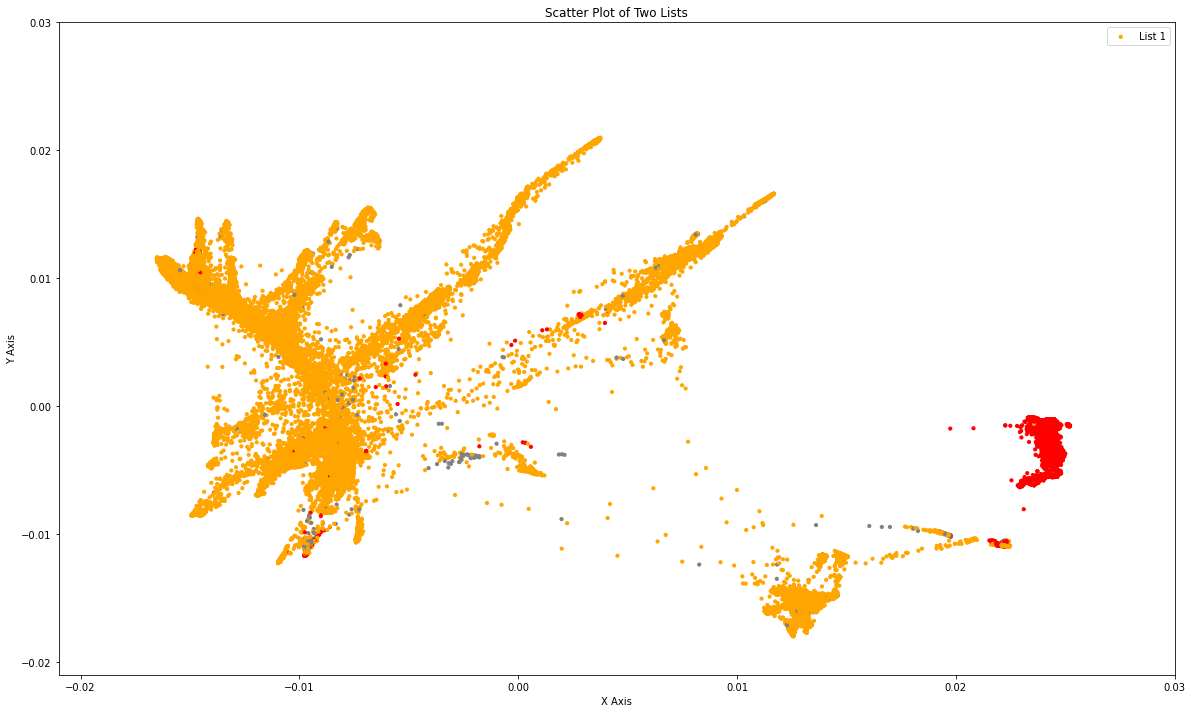

In [153]:
plt.figure(figsize=(20, 12))
x1, y1 = zip(*[[i,j] for i,j in zip(twoD['New_x'],twoD['New_y'])])
plt.scatter(x1, y1, color=c_pos_1,s=10, label='List 1')

# Adding labels and legend
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of Two Lists')
plt.legend()
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
# Show the plot
plt.show()

## Golgi Signal Peptide Analysis 

In [190]:
SP=pd.read_table('/grid/lippman/home/igentile/CLEs_All_Round2_merged.filtered_final.Sig_Peptide.txt', header=None)

In [198]:
SP_presence={}
for i in SP.index:
    SP_presence[SP.loc[i][0]]=['Yes' if i=='SP' else 'No' for i in [SP.loc[i][1]]][0]

In [203]:
SP_presence_f={k:v for k,v in SP_presence.items() if k in list(twoD['ID'])}
for i in list(twoD['ID']):
    if i not in SP_presence_f:
        SP_presence_f[i]='No'

In [205]:
SP_presence_f
twoD['SP'] = twoD['ID'].map(SP_presence_f)


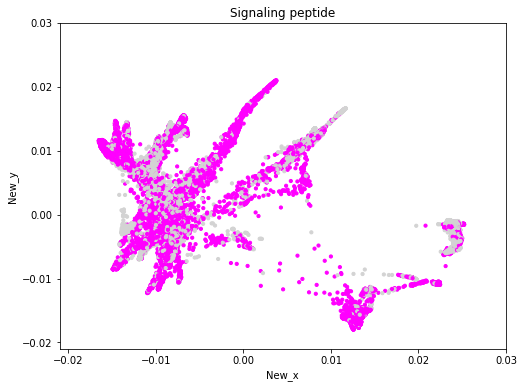

In [210]:
colors = twoD['SP'].map({'Yes': 'fuchsia', 'No': 'lightgrey'})

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(twoD['New_x'], twoD['New_y'],s=10, color=colors)
plt.title('Signaling peptide')
plt.xlabel('New_x')
plt.ylabel('New_y')
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.show()

In [212]:
records2_di={str(i.id):str(i.seq) for i in records2}

In [225]:
SP_gff=pd.read_csv('~/CLEs_All_Round2_merged.filtered_final.Sig_Peptide.gff', sep='\t',header=None)

In [227]:
SP_sequence={}
for a,b,c,d in zip(SP_gff[0],SP_gff[2],SP_gff[3],SP_gff[4]):
    if a in records2_di:
        if b =='h-region':
            start,end=int(c),int(d)
            SP_sequence[a]=records2_di[a][start:end]
            

In [280]:
amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

# Initialize an empty DataFrame
df = pd.DataFrame(columns=amino_acids)


for seq_name, sequence in {k: v for k, v in SP_sequence.items() if len(v) < 20 and len(v)>7}.items():
    total_length = len(sequence)
    if total_length > 0:  # Ensure the sequence length is not zero to avoid division by zero
        aa_count = {aa: (sequence.count(aa) / total_length) * 100 for aa in amino_acids}
        df = df.append(pd.Series(aa_count, name=seq_name))


In [1466]:
df_SP=df[['L','I','V',"F"]]

Text(0, 0.5, 'Principal Component 2')

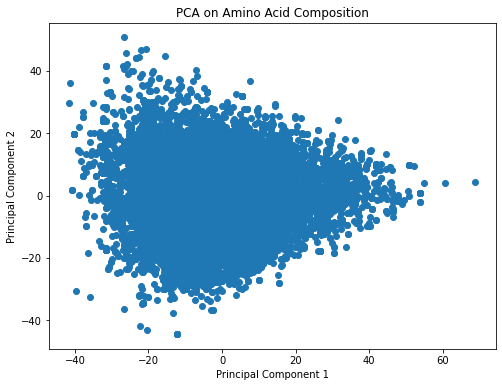

In [281]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Visualizing the results of PCA
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('PCA on Amino Acid Composition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [1]:
#PC1 distibution on PHATE

(-0.021, 0.03)

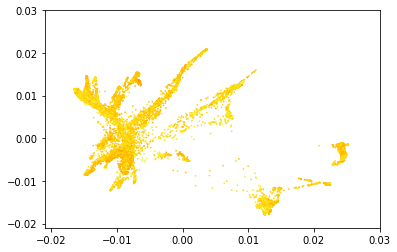

In [1476]:

twoD_expanded=twoD.merge(df_SP, left_on='ID', right_index=True)
twoD_expanded=twoD.merge(principal_df, left_on='ID', right_index=True)


plt.scatter(twoD_expanded['New_x'], twoD_expanded['New_y'], s=.5,
            c=twoD_expanded['PC1'], cmap='Wistia')  # 'Wistia' goes from white to orange

plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
# plt.show()

In [ ]:
#save data

In [1484]:

all_data=twoD_expanded.merge(df_clustering, left_on='ID', right_on='id')

In [1487]:
all_data.to_csv('all_data_dodecas.csv',index=False)

In [110]:
all_data=pd.read_csv('all_data_dodecas.csv')

In [114]:
sub_1600=all_data[all_data['neighbors_1600_2']==0]
info_sp={str(i.id):str(i.description).split('\t')[1].replace('species=','') for i in  list(SeqIO.parse('/grid/lippman/analysis/raw_data/IG_genomes/CLEs_All_Round2_merged.filtered.filtered.fasta','fasta'))}
sub_1600['sp']=[info_sp[i] for i in sub_1600['ID']]


/grid/it/data/elzar/easybuild/software/Python/3.7.4-GCCcore-8.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
sub_1600[sub_1600['sp']=='Solanum lycopersicum']

ID     New_x     New_y  \
11209  S.lycopersicum.ZY65.genomic.fna_Sly02_37257232...  0.013234 -0.015275   
11211  S.lycopersicum.ZY65.genomic.fna_Sly07_58042640...  0.013391 -0.015458   
11212  S.lycopersicum.ZY65.genomic.fna_Sly07_61476060...  0.013261 -0.015438   
11213  S.lycopersicum.ZY65.genomic.fna_Sly07_58031520...  0.013000 -0.015053   
11218  S.lycopersicum.ZY65.genomic.fna_Sly12_5065886_...  0.013352 -0.015546   
11219  S.lycopersicum.ZY65.genomic.fna_Sly12_3785208_...  0.013476 -0.015335   
11220  S.lycopersicum.ZY65.genomic.fna_Sly10_1641479_...  0.013151 -0.015473   
11221  S.lycopersicum.ZY65.genomic.fna_Sly07_61465980...  0.012925 -0.016574   
11236  S.lycopersicum.ZY65.genomic.fna_Sly10_1637527_...  0.013390 -0.015526   
11243  S.lycopersicum.ZY65.genomic.fna_Sly02_37248209...  0.013403 -0.015583   
11249  BGV006775_MAS2.0.fna_BGV006775_MAS2.0ch07_6429...  0.012948 -0.015209   

             Dodeca Pos_0 Pos_1 Pos_2 Pos_3 Pos_4 Pos_5  ... neighbors_1700_1  \
11209  RVAPGGPDPQHH     R     V     A     P     G     G  ...                2   
11211  RRSPGGPDPKHH     R     R     S     P     G     G  ...                2   
11212  RLSPGGPDPKHH     R     L     S     P     G     G  ...                2   
11213  RVVPGGPDSQHH     R     V     V     P     G     G  ...                2   
11218  RLSPGGPDPRHH     R     L     S     P     G     G  ...                2   
11219  RISPGGPDPKHH     R     I     S     P     G     G  ...                2   
11220  RLSPRGPNPKHH     R     L     S     P     R     G  ...                2   
11221  RVAPQGPDAQHH     R     V     A     P     Q     G  ...                2   
11236  RLSPGGPDPRHH     R     L     S     P     G     G  ...                2   
11243  RVSPGGPDPHHH     R     V     S     P     G     G  ...                2   
11249  RVVPSGPDSQHH     R     V     V     P     S     G  ...                2   

      neighbors_1800_1 neighbors_1900_1 neighbors_2000_1 neighbors_3000_1  \
11209                2                2                2                2   
11211                2                2                2                2   
11212                2                2                2                2   
11213                2                2                2                2   
11218                2                2                2                2   
11219                2                2                2                2   
11220                2                2                2                2   
11221                2                2                2                2   
11236                2                2                2                2   
11243                2                2                2                2   
11249                2                2                2                2   

      neighbors_4000_1  neighbors_5000_1 neighbors_8500_1  neighbors_10500_1  \
11209                1                 1                1                  1   
11211                1                 1                1                  1   
11212                1                 1                1                  1   
11213                1                 1                1                  1   
11218                1                 1                1                  1   
11219                1                 1                1                  1   
11220                1                 1                1                  1   
11221                1                 1                1                  1   
11236                1                 1                1                  1   
11243                1                 1                1                  1   
11249                1                 1                1                  1   

                         sp  
11209  Solanum lycopersicum  
11211  Solanum lycopersicum  
11212  Solanum lycopersicum  
11213  Solanum lycopersicum  
11218  Solanum lycopersicum  
11219  Solanum lycopersicum  
11220  Solanum lycopersi

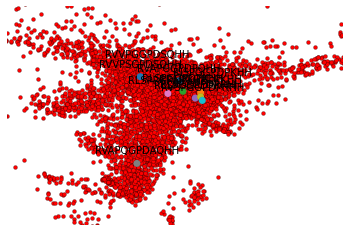

In [1644]:
import matplotlib.pyplot as plt

# Your data
sub = merged_df[merged_df['neighbors_1600_2'] == 0]
cle_11s_x = list(sub_1600[sub_1600['sp'] == 'Solanum lycopersicum']['New_x'])
cle_11s_y = list(sub_1600[sub_1600['sp'] == 'Solanum lycopersicum']['New_y'])
cle_11s_d = list(sub_1600[sub_1600['sp'] == 'Solanum lycopersicum']['Dodeca'])

# Plot the initial scatter plot
plt.scatter(sub['New_x'], sub['New_y'], c='red', s=15,edgecolors='black',linewidth=.25)

# Plot the points of interest
plt.scatter(cle_11s_x, cle_11s_y, c=[f'C{n}' for n,i in enumerate(cle_11s_x)], s=50.5, edgecolors='black', linewidth=0.05)

# Annotate the points of interest
for x, y, label in zip(cle_11s_x, cle_11s_y, cle_11s_d):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Zoom in around the points of interest
padding = 0.00095  # This can be adjusted to give more or less padding
x_min, x_max = min(cle_11s_x) - padding, max(cle_11s_x) + padding
y_min, y_max = min(cle_11s_y) - padding, max(cle_11s_y) + padding
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Add labels and title for clarity
plt.xlabel('New_x')
plt.ylabel('New_y')
# plt.title('Zoomed Scatter Plot with Annotations')
plt.axis('off')
plt.savefig("./zoom_in_cle11_clade.pdf", dpi=1600, bbox_inches='tight')

plt.show()

In [ ]:
# plt.scatter(all_data['New_x'], all_data['New_y'], s=.5,
            c=[f'C{i+1}' for i in all_data['neighbors_4000_1']])  # 'Wistia' goes from white to orange
# plt.title('Signaling peptide')
# plt.xlabel('New_x')
# plt.ylabel('New_y')
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)

In [283]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by PC1 and PC2:", explained_variance)

# Features contributing to each principal component
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=amino_acids, columns=['PC1', 'PC2'])

# Top features for PC1 and PC2
print("Top features contributing to PC1:")
print(feature_contributions['PC1'].nlargest(3))
print("Top features contributing to PC2:")
print(feature_contributions['PC2'].nlargest(3))


Explained variance by PC1 and PC2: [0.29383071 0.18875338]
Top features contributing to PC1:
L    0.894649
E    0.008988
H    0.004485
Name: PC1, dtype: float64
Top features contributing to PC2:
F    0.675545
I    0.191288
L    0.085078
Name: PC2, dtype: float64


In [1260]:
sorted(list(feature_contributions['PC1'].items()), key=lambda x:x[-1])

[('I', -0.3167194293711158),
 ('F', -0.22645706876206265),
 ('V', -0.2116273325981867),
 ('M', -0.03035519489270985),
 ('G', -0.027861780565709777),
 ('S', -0.019558251126138487),
 ('R', -0.018168880495419627),
 ('T', -0.018137809541105377),
 ('Y', -0.011924790334893225),
 ('A', -0.010535507106914806),
 ('N', -0.00976463632300125),
 ('W', -0.004488677086018622),
 ('Q', -0.0035643583412403594),
 ('C', -0.0002590636955581924),
 ('K', 0.00027508085035314866),
 ('D', 0.00043200608391152337),
 ('P', 0.0009337185501823883),
 ('H', 0.004484632000389957),
 ('E', 0.008988422442755432),
 ('L', 0.8946491141869275)]

In [1261]:
sorted(list(feature_contributions['PC2'].items()), key=lambda x:x[-1])

[('V', -0.6292418728877884),
 ('A', -0.29865777086154416),
 ('C', -0.057955447194495496),
 ('G', -0.05638602299380051),
 ('M', -0.03657176482018304),
 ('R', -0.025190331894231793),
 ('E', -0.003791966820848368),
 ('D', -0.0016885875810469552),
 ('P', -0.0012254307323674811),
 ('Q', 0.0027205756369381847),
 ('N', 0.005483147279665716),
 ('W', 0.006140564285620088),
 ('K', 0.0072968196447741746),
 ('Y', 0.008330182159854264),
 ('H', 0.027556234034588532),
 ('T', 0.044350520091628556),
 ('S', 0.056695012402583914),
 ('L', 0.08507842060796568),
 ('I', 0.19128831480319922),
 ('F', 0.675545113539851)]

In [284]:
max_pc1_seq = principal_df['PC1'].idxmax()
min_pc1_seq = principal_df['PC1'].idxmin()

# Print the sequences with their names
print(f"Sequence with maximum PC1 value ({max_pc1_seq}): {SP_sequence[max_pc1_seq]}")
print(f"Sequence with minimum PC1 value ({min_pc1_seq}): {SP_sequence[min_pc1_seq]}")


Sequence with maximum PC1 value (Sonneratia_GCA_900006705.1_sca_genomic.fna_CXYZ01014885.1_457598_460840.fna): LLLLLLLLL
Sequence with minimum PC1 value (Lupinus_GCA_025802155.1_ASM2580215v1_genomic.fna_JAOYNF010047844.1_4272_7574.fna): FSSTTIIIFIFIFFFI


In [291]:
max_pc2_seq = principal_df['PC2'].idxmax()
min_pc2_seq = principal_df['PC2'].idxmin()

# Print the sequences with their names
print(f"Sequence with maximum PC2 value ({max_pc1_seq}): {SP_sequence[max_pc2_seq]}")
print(f"Sequence with minimum PC2 value ({min_pc1_seq}): {SP_sequence[min_pc2_seq]}")


Sequence with maximum PC2 value (Sonneratia_GCA_900006705.1_sca_genomic.fna_CXYZ01014885.1_457598_460840.fna): ILFFFFFFFFFLF
Sequence with minimum PC2 value (Lupinus_GCA_025802155.1_ASM2580215v1_genomic.fna_JAOYNF010047844.1_4272_7574.fna): VVVVLLVCVVLV


(array([2.9000e+02, 3.5850e+03, 1.9563e+04, 1.6780e+03, 1.6000e+01,
        0.0000e+00, 1.0000e+00, 3.8000e+01, 3.2000e+01, 1.5000e+01]),
 array([ 0. ,  6.1, 12.2, 18.3, 24.4, 30.5, 36.6, 42.7, 48.8, 54.9, 61. ]),
 <BarContainer object of 10 artists>)

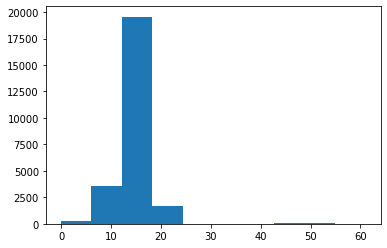

In [233]:
plt.hist([len(i) for i in SP_sequence.values()])

In [130]:
# for i in [50,100,200,500]:
#     print(i)
#     leiden_clusters=cluster_by_connectivity_leiden(embedding.values,i,resolution_parameter = 1)
#     print(len(set(leiden_clusters)))

In [131]:
# for i in [50,100,200,500]:
#     print(i)
#     leiden_clusters=cluster_by_connectivity_leiden(embedding.values,i,resolution_parameter = 2)
#     print(len(set(leiden_clusters)))

In [48]:
# sequences_2

In [154]:
embedding_f=embedding.loc[sequences_2.keys()]

In [1316]:
leiden_clusters=cluster_by_connectivity_leiden(embedding_f.values,20000,resolution_parameter = 1)
# louvain_clusters=cluster_by_connectivity_louvain(embedding.values,50,resolution_parameter = 1)

In [1317]:
#sono quiiiii

In [1319]:
len(set(leiden_clusters))

3

In [ ]:
! touch i_am_done_for_10500.txt

In [1320]:
df_clustering['neighbors_10500_1']=leiden_clusters

In [1321]:
df_clustering

id  neighbors_200_1  \
0      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                0   
1      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                5   
2      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                2   
3      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                2   
4      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                1   
...                                                  ...              ...   
40510  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                5   
40511  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                2   
40512  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                1   
40513  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                2   
40514  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                2   

       neighbors_200_2  neighbors_200_3  neighbors_400_1  neighbors_400_2  \
0                    0                0                1                0   
1                    8               11                5                5   
2                    1                1                6                8   
3                   17               24                0                2   
4                    2               10                2                1   
...                ...              ...              ...              ...   
40510                8               14                5                5   
40511                1                1                0                2   
40512                5                4                2                6   
40513                1               14                6                8   
40514                1                1                0                2   

       neighbors_400_3  neighbors_700_1  neighbors_700_2  neighbors_700_3  \
0                    0                1                0                0   
1                   11                5                6                6   
2                    5                6                8                5   
3                   16                0                2               15   
4                    1                2                1                2   
...                ...              ...              ...              ...   
40510               17                5                6                6   
40511                4                0                2                9   
40512                3                0                7                4   
40513                5                6                8                5   
40514               12                0                2               14   

       ...  neighbors_1500_1  neighbors_1700_1  neighbors_1800_1  \
0      ...                 2                 2                 2   
1      ...                 1                 1                 1   
2      ...                 4                 0                 0   
3      ...                 0                 0                 0   
4      ...                 1                 1                 1   
...    ...               ...               ...               ...   
40510  ...                 1                 1                 1   
40511  ...                 0                 0                 0   
40512  ...                 0                 0                 0   
40513  ...                 4                 4                 4   
40514  ...                 0                 0                 0   

       neighbors_1900_1  neighbors_2000_1  neighbors_3000_1  neighbors_4000_1  \
0                     2                 2                 2                 1   
1                     1                 1                 1                 2   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     1                 1                

In [1322]:
# df_clustering=pd.read_csv("./clustering_results_PHATE.csv")


In [1307]:
# ! head ./clustering_results_PHATE_all_info.csv

In [1299]:
# df_clustering

In [29]:
# from sklearn.neighbors import NearestNeighbors
# import igraph as ig
# from tqdm import tqdm

# #weighted graph

# # Initialize and fit the NearestNeighbors model
# neighbors = NearestNeighbors(
#     n_neighbors=500,
#     metric='euclidean',
#     metric_params=None,
#     n_jobs=8,
# )
# neighbors.fit(embedding.values)



In [402]:
print(len(embedding_f.values), len(twoD))
# twoD['ID']

36241 36241


In [1273]:
leiden_clusters=cluster_by_connectivity_leiden(embedding_f.values,1600,resolution_parameter = 1)
print(j, len(set(leiden_clusters)))

2000 5


In [1289]:
# myata

neighbors_1600_1


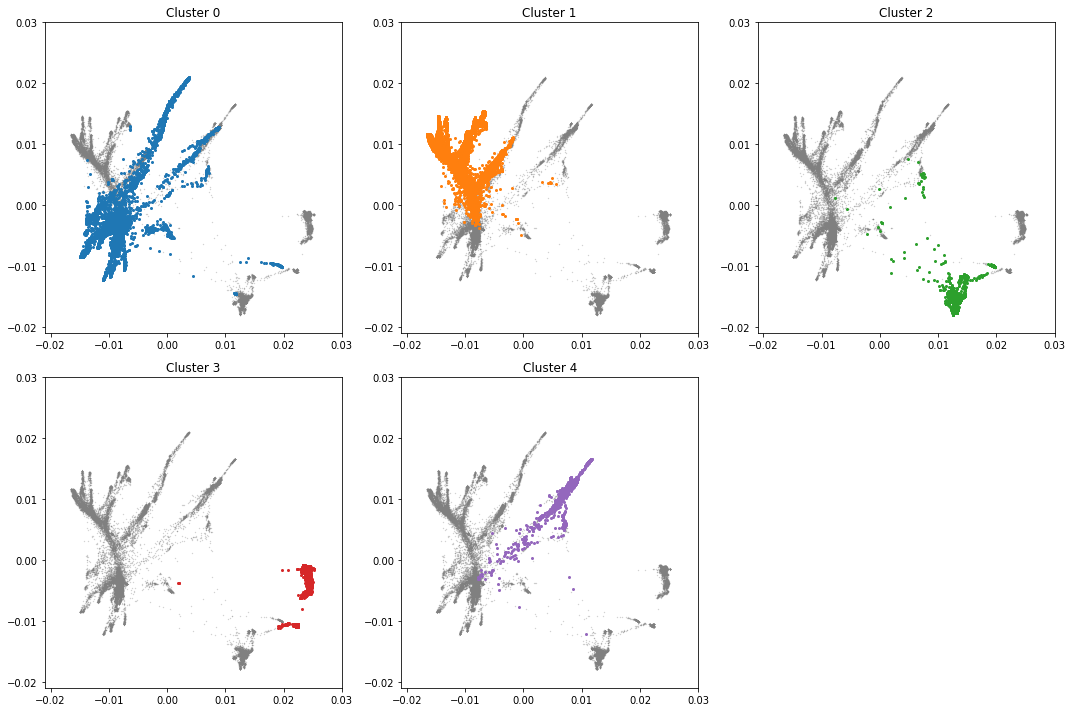

neighbors_1400_1


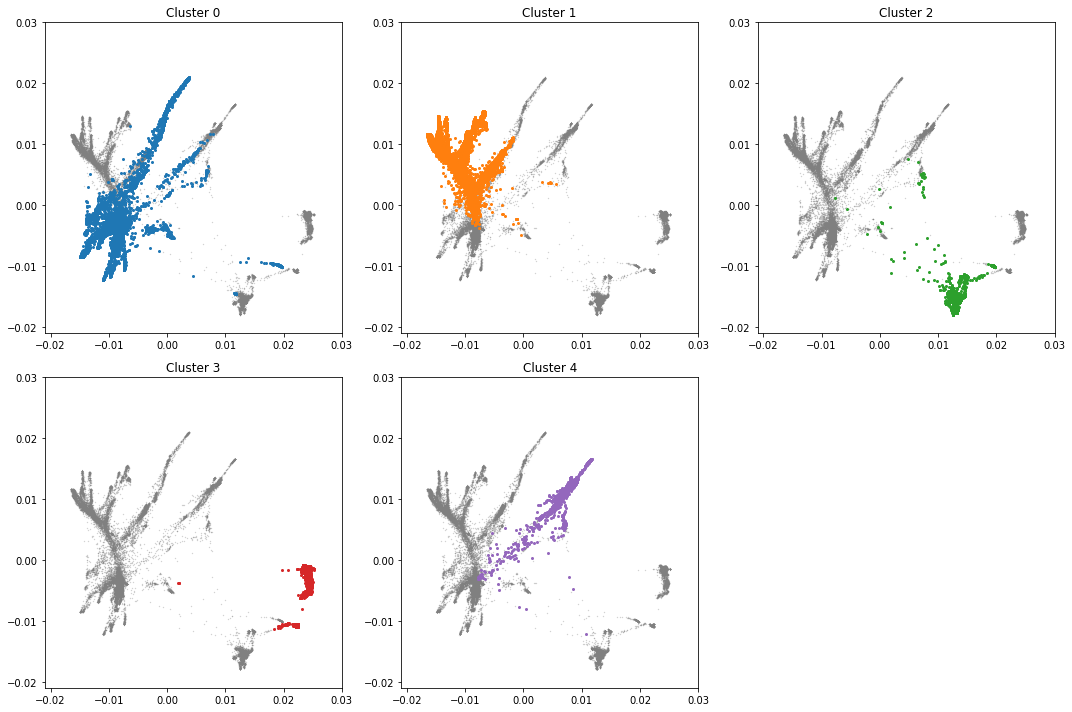

neighbors_1500_1


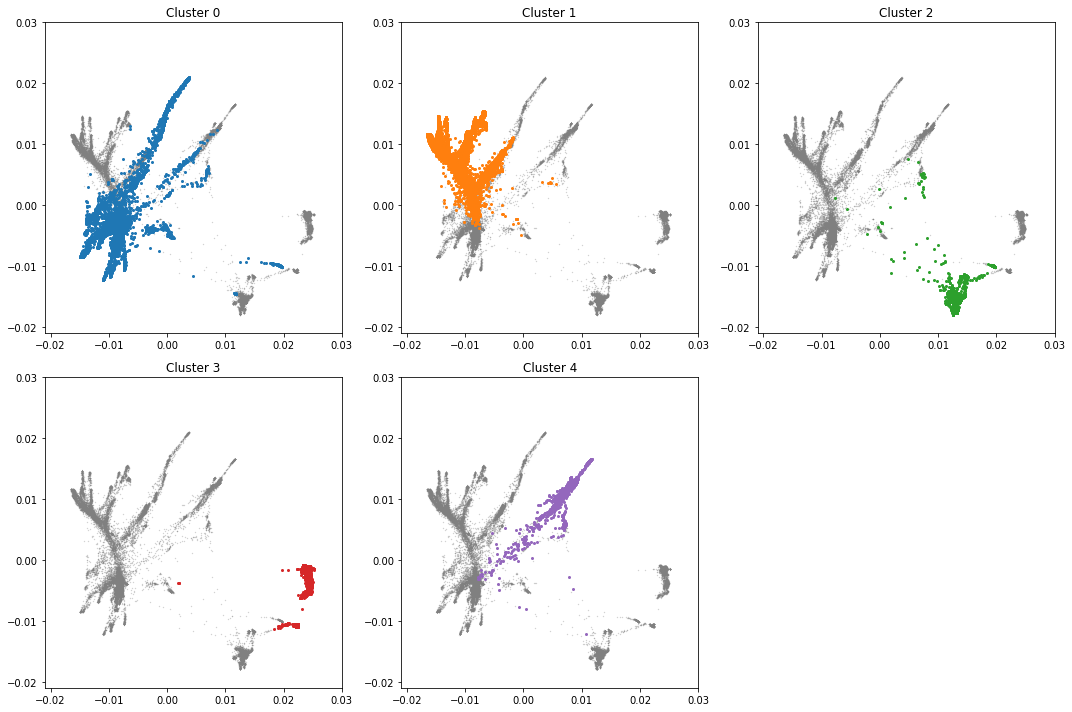

neighbors_1700_1


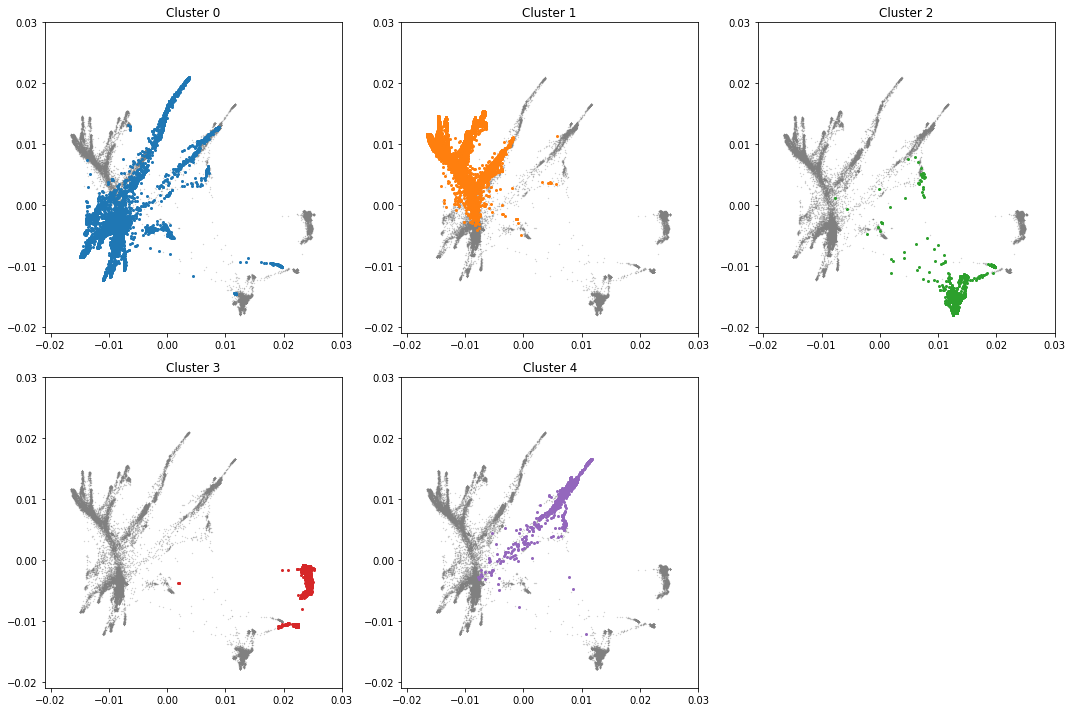

neighbors_1800_1


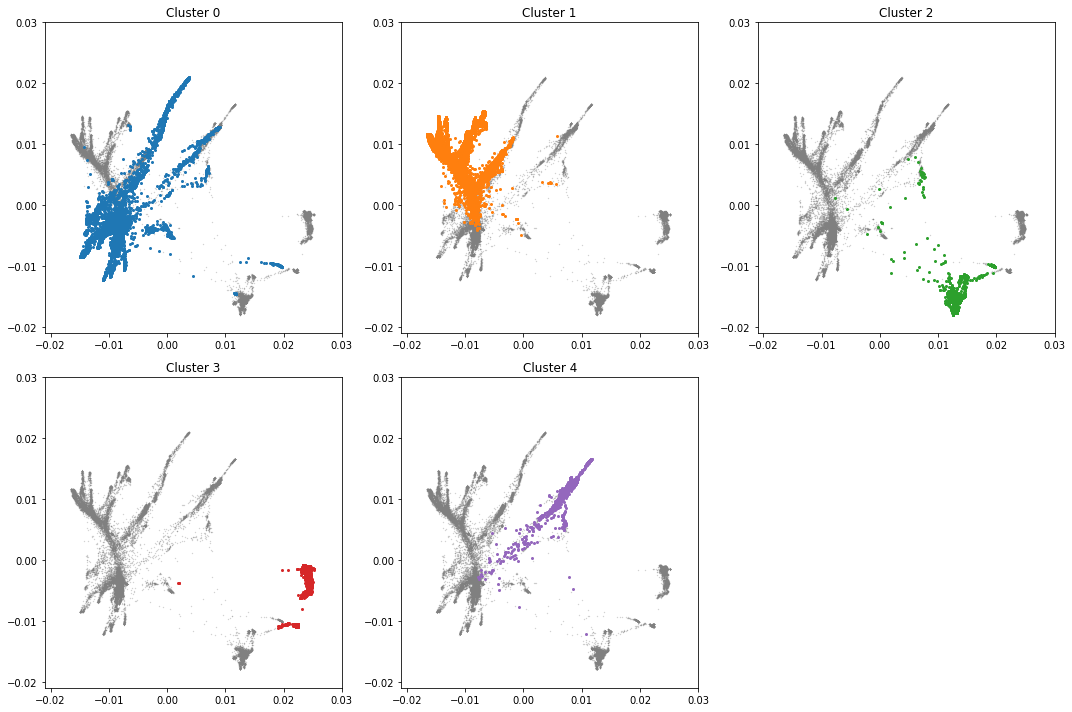

neighbors_1900_1


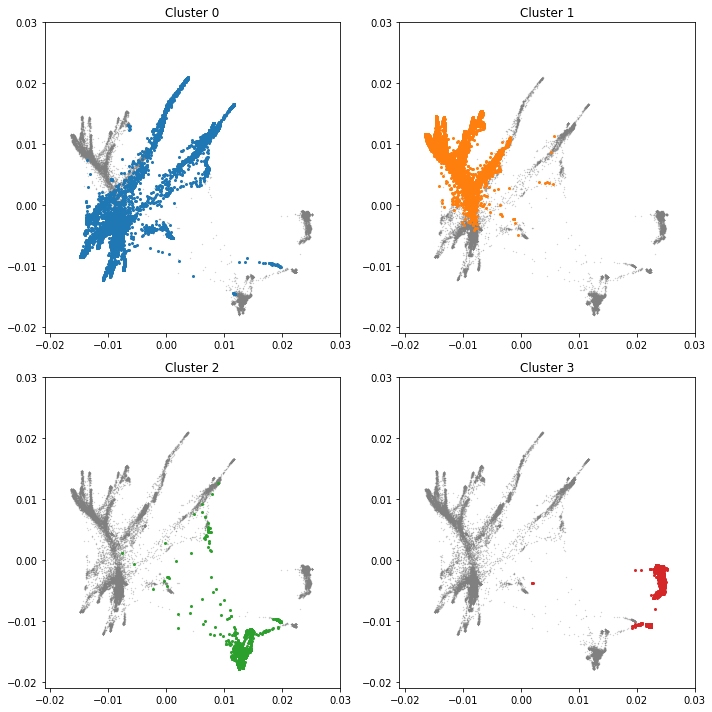

neighbors_2000_1


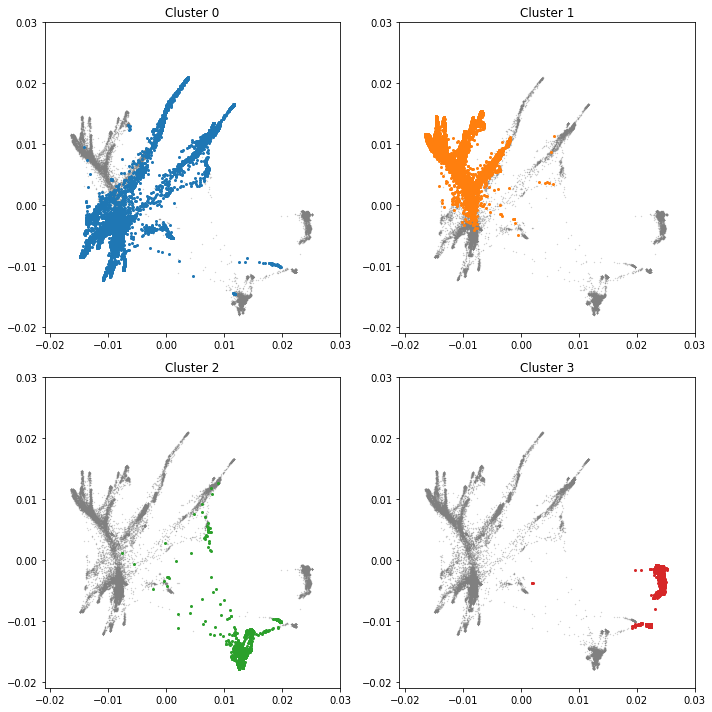

neighbors_3000_1


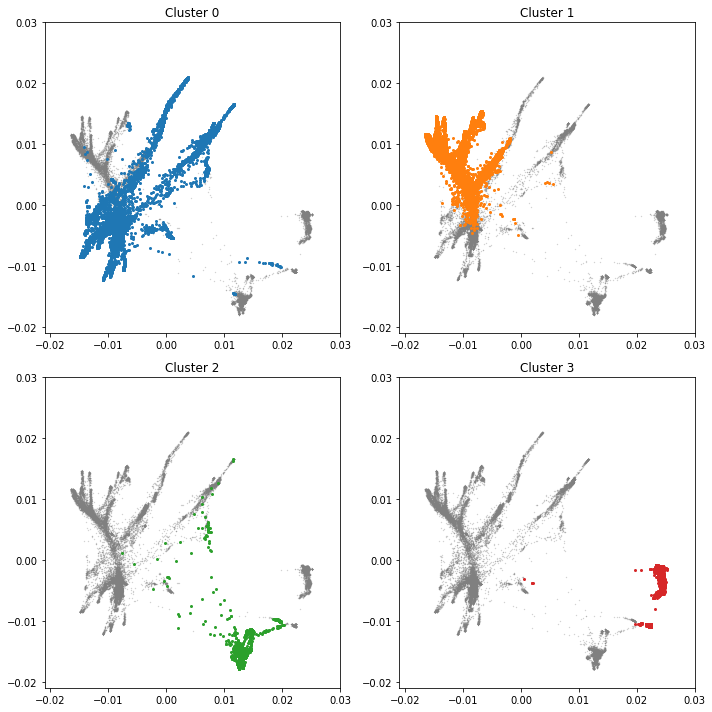

neighbors_4000_1


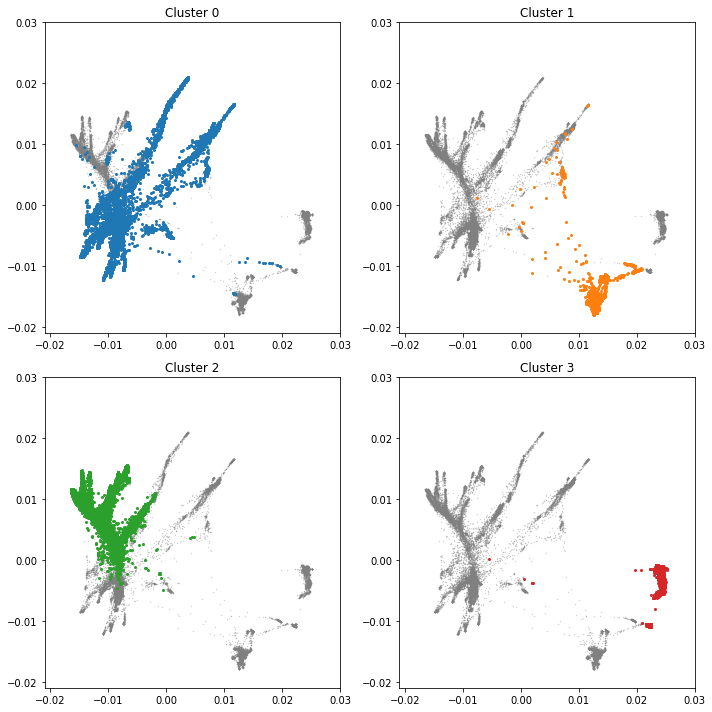

In [1293]:
for i in df_clustering.columns:
    if len(set(df_clustering[i]))<6:
        print(i)
        myata=pd.DataFrame({'id':twoD['ID'],'x':twoD['New_x'],'y':twoD['New_y'],'c':df_clustering[i]})
        unique_clusters = sorted(set(df_clustering[i]))
        n_clusters = len(set(myata['c']))
        cols = int(np.ceil(np.sqrt(n_clusters)))
        rows = int(np.ceil(n_clusters / cols))

        fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows), squeeze=False)

        for i, ax in zip(unique_clusters, axes.flatten()):
            my = myata[myata['c'] == i]
            # Plot all points in grey
            ax.scatter(myata['x'], myata['y'], c='grey', alpha=0.5, s=0.1)
            # Highlight the points in the cluster
            ax.scatter(my['x'], my['y'], c=f'C{i}', s=4)
            ax.set_xlim(-0.021, 0.03)
            ax.set_ylim(-0.021, 0.03)
            ax.set_title(f'Cluster {i}')

        # Hide unused axes if any
        for ax in axes.flatten()[n_clusters:]:
            ax.axis('off')

        plt.tight_layout()
        plt.show()


In [ ]:
def run_clustering(data, neighbors_list, resolution_parameter):
    clustering_results = {}
    for neighbors in neighbors_list:
        groups = cluster_by_connectivity_leiden(data, neighbors, resolution_parameter)
        clustering_results[f"neighbors_{neighbors}"] = groups
    
    df_clustering = pd.DataFrame(clustering_results)
    return df_clustering

In [ ]:
# neighbors_list = [50,80,100,200]
# resolution_parameter = 2.0

# df_clustering = run_clustering(embedding_f.values, neighbors_list, resolution_parameter)

In [ ]:
# df_clustering['Names']=twoD['ID']

In [1323]:
df_clustering_2=df_clustering[[i for i in df_clustering.columns if "neighbors_" in i]]

In [1324]:
df_clustering_2

neighbors_200_1  neighbors_200_2  neighbors_200_3  neighbors_400_1  \
0                    0                0                0                1   
1                    5                8               11                5   
2                    2                1                1                6   
3                    2               17               24                0   
4                    1                2               10                2   
...                ...              ...              ...              ...   
40510                5                8               14                5   
40511                2                1                1                0   
40512                1                5                4                2   
40513                2                1               14                6   
40514                2                1                1                0   

       neighbors_400_2  neighbors_400_3  neighbors_700_1  neighbors_700_2  \
0                    0                0                1                0   
1                    5               11                5                6   
2                    8                5                6                8   
3                    2               16                0                2   
4                    1                1                2                1   
...                ...              ...              ...              ...   
40510                5               17                5                6   
40511                2                4                0                2   
40512                6                3                0                7   
40513                8                5                6                8   
40514                2               12                0                2   

       neighbors_700_3  neighbors_1000_1  ...  neighbors_1500_1  \
0                    0                 1  ...                 2   
1                    6                 4  ...                 1   
2                    5                 5  ...                 4   
3                   15                 0  ...                 0   
4                    2                 2  ...                 1   
...                ...               ...  ...               ...   
40510                6                 4  ...                 1   
40511                9                 0  ...                 0   
40512                4                 0  ...                 0   
40513                5                 5  ...                 4   
40514               14                 0  ...                 0   

       neighbors_1700_1  neighbors_1800_1  neighbors_1900_1  neighbors_2000_1  \
0                     2                 2                 2                 2   
1                     1                 1                 1                 1   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     1                 1                 1                 1   
...                 ...               ...               ...               ...   
40510                 1                 1                 1                 1   
40511                 0                 0                 0                 0   
40512                 0                 0                 0                 0   
40513                 4                 4                 0                 0   
40514                 0                 0                 0                 0   

       neighbors_3000_1  neighbors_4000_1  neighbors_5000_1  neighbors_8500_1  \
0                     2                 1                 1                 1   
1                     1                 2                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0              

In [1325]:
df_clustering_2.to_csv("./clustering_results_PHATE_new_new.csv", index=False)


In [1187]:
# ! head ./clustering_results_PHATE.csv

In [1251]:
# ! rm ./clustering_results_PHATE.csv

In [1142]:
df_clustering=pd.read_csv("./clustering_results_PHATE.csv")


In [1194]:
df_clustering

id  neighbors_30  \
0      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...             0   
1      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...             5   
2      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...             1   
3      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...            29   
4      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...             9   
...                                                  ...           ...   
40510  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...             5   
40511  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...             1   
40512  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...            49   
40513  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...             1   
40514  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...             1   

       neighbors_50  neighbors_80  neighbors_100  neighbors_200  
0                 0             0              0              0  
1                 5             4              4              8  
2                 1             1              1              1  
3                27            27             25              1  
4                 4             7             10              2  
...             ...           ...            ...            ...  
40510             5             4              4              8  
40511             1             1              1              1  
40512            34            32              9              5  
40513             1             1              1              1  
40514             1             1              1              1  

[36241 rows x 6 columns]

In [1199]:
df_clustering.set_index('id', inplace=True)

# Merge twoD with df_clustering, aligning IDs with names
result = twoD.merge(df_clustering, how='inner', left_on='ID', right_index=True)


In [1201]:
result

ID     New_x     New_y  \
0      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...  0.013176 -0.015382   
1      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.004637  0.007176   
2      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.007425 -0.002521   
3      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.007634 -0.003609   
4      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g... -0.014062  0.008944   
...                                                  ...       ...       ...   
40510  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn... -0.008590  0.002461   
40511  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn... -0.008122 -0.003299   
40512  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn... -0.008809  0.000707   
40513  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn... -0.004252 -0.003054   
40514  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn... -0.008294 -0.003614   

             Dodeca Pos_0 Pos_1 Pos_2 Pos_3 Pos_4 Pos_5  ... Pos_9 Pos_10  \
0      RVSLGGPDPQHH     R     V     S     L     G     G  ...     Q      H   
1      RQIPSSPDRLHN     R     Q     I     P     S     S  ...     L      H   
2      RIVPSGPNPLHH     R     I     V     P     S     G  ...     L      H   
3      RRVPSGPNPLHH     R     R     V     P     S     G  ...     L      H   
4      RKIGRGSDPIHN     R     K     I     G     R     G  ...     I      H   
...             ...   ...   ...   ...   ...   ...   ...  ...   ...    ...   
40510  RRVPSCPDPLHN     R     R     V     P     S     C  ...     L      H   
40511  RLVPQGPNPLHH     R     L     V     P     Q     G  ...     L      H   
40512  RKVPVGSNPIHN     R     K     V     P     V     G  ...     I      H   
40513  REVPTGPDPLHH     R     E     V     P     T     G  ...     L      H   
40514  RVVPTGPNPLHN     R     V     V     P     T     G  ...     L      H   

      Pos_11 leiden   SP neighbors_30  neighbors_50 neighbors_80  \
0          H      1  Yes            0             0            0   
1          N      4   No            5             5            4   
2          H      0  Yes            1             1            1   
3          H     22   No           29            27           27   
4          N     10  Yes            9             4            7   
...      ...    ...  ...          ...           ...          ...   
40510      N      4   No            5             5            4   
40511      H      0  Yes            1             1            1   
40512      N     26  Yes           49            34           32   
40513      H      0  Yes            1             1            1   
40514      N      0   No            1             1            1   

       neighbors_100  neighbors_200  
0                  0              0  
1                  4              8  
2                  1              1  
3                 25              1  
4                 10              2  
...              ...            ...  
40510              4              8  
40511              1              1  
40512              9              5  
40513              1              1  
40514              1              1  

[36241 rows x 23 columns]

200 22


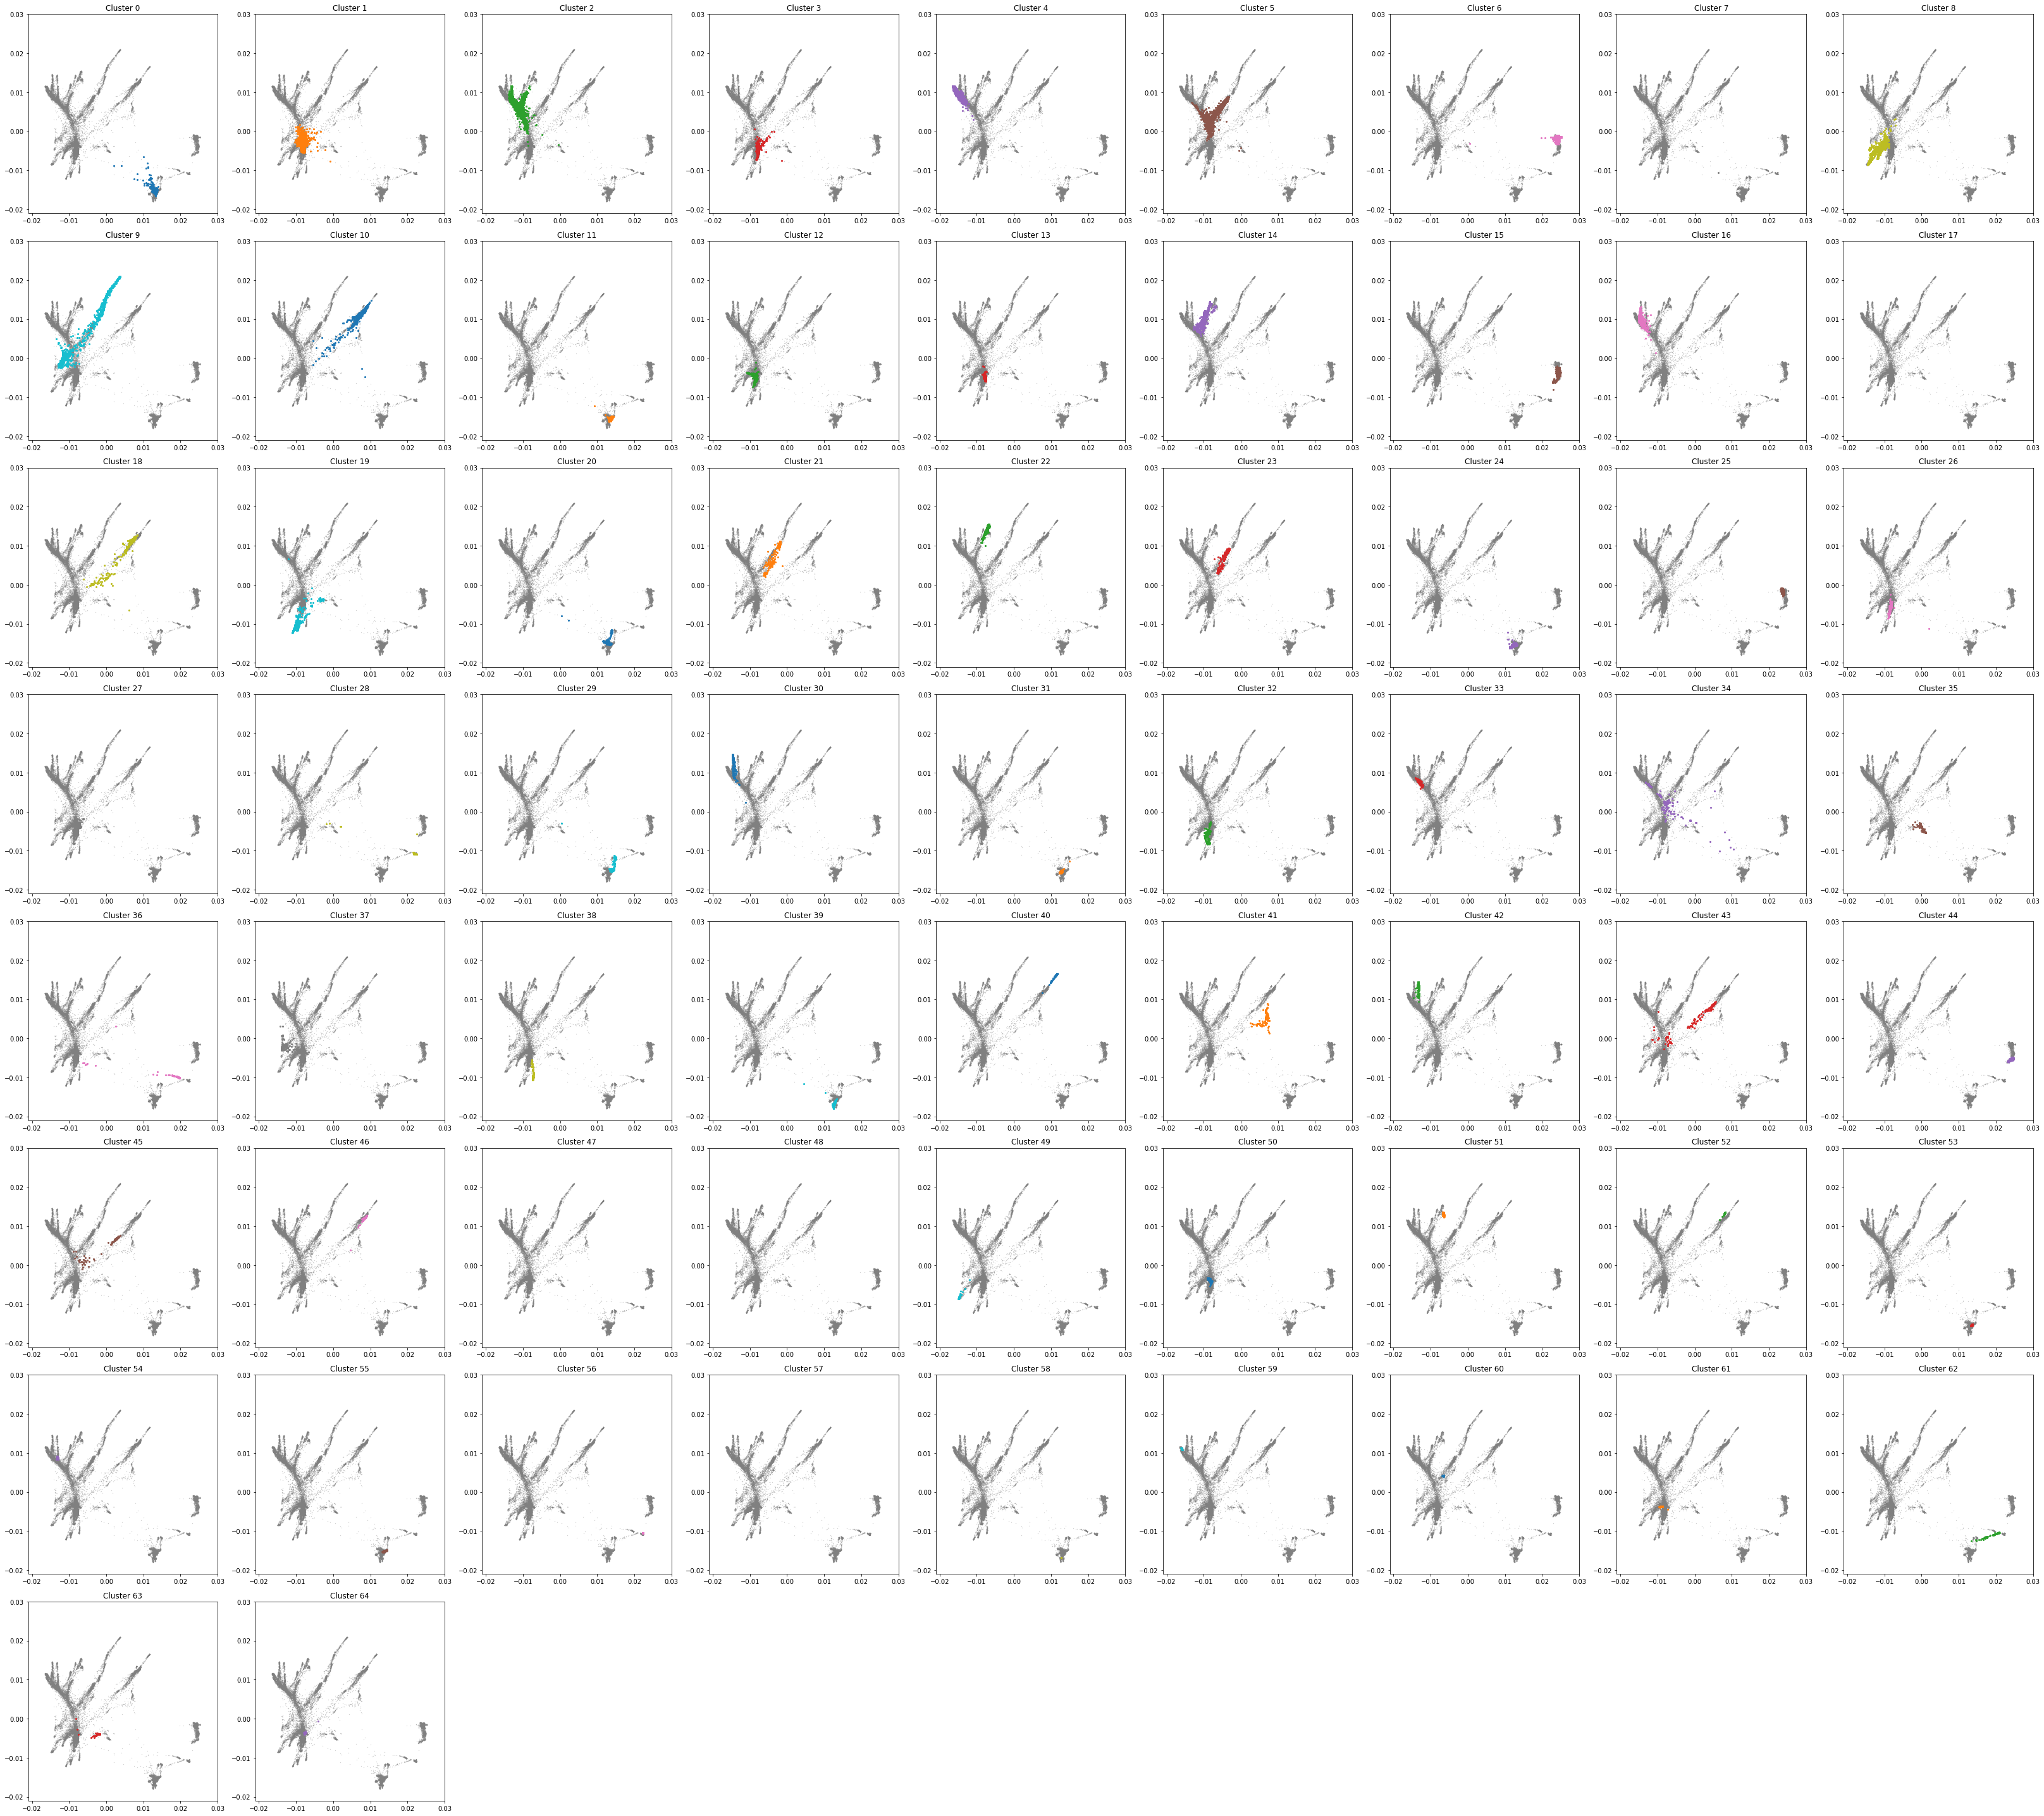

In [1202]:
# for j in [100,200,500,1000]:
print(j, len(set(leiden_clusters)))
myata=pd.DataFrame({'id':result['ID'],'x':result['New_x'],'y':result['New_y'],'c':result['neighbors_50']})
unique_clusters = sorted(set(result['neighbors_50']))
n_clusters = len(unique_clusters)
cols = int(np.ceil(np.sqrt(n_clusters)))
rows = int(np.ceil(n_clusters / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows), squeeze=False)

for i, ax in zip(unique_clusters, axes.flatten()):
    my = myata[myata['c'] == i]
    # Plot all points in grey
    ax.scatter(myata['x'], myata['y'], c='grey', alpha=0.5, s=0.1)
    # Highlight the points in the cluster
    ax.scatter(my['x'], my['y'], c=f'C{i}', s=4)
    ax.set_xlim(-0.021, 0.03)
    ax.set_ylim(-0.021, 0.03)
    ax.set_title(f'Cluster {i}')

# Hide unused axes if any
for ax in axes.flatten()[n_clusters:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
for j in [100,1000,5000,10000]:
    leiden_clusters=cluster_by_connectivity_leiden(embedding_f.values,50,resolution_parameter = 3)
    print(j, len(set(leiden_clusters)))
    myata=pd.DataFrame({'id':twoD['ID'],'x':twoD['New_x'],'y':twoD['New_y'],'c':leiden_clusters})
    unique_clusters = sorted(set(leiden_clusters))
    n_clusters = len(unique_clusters)
    cols = int(np.ceil(np.sqrt(n_clusters)))
    rows = int(np.ceil(n_clusters / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows), squeeze=False)

    for i, ax in zip(unique_clusters, axes.flatten()):
        my = myata[myata['c'] == i]
        # Plot all points in grey
        ax.scatter(myata['x'], myata['y'], c='grey', alpha=0.5, s=0.1)
        # Highlight the points in the cluster
        ax.scatter(my['x'], my['y'], c=f'C{i}', s=4)
        ax.set_xlim(-0.021, 0.03)
        ax.set_ylim(-0.021, 0.03)
        ax.set_title(f'Cluster {i}')

    # Hide unused axes if any
    for ax in axes.flatten()[n_clusters:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [286]:
CLU={}
for i in principal_df.index:
    if len(list(myata[myata['id']==i]['c']))>0:
        m=list(myata[myata['id']==i]['c'])[0]
    
        CLU[i]=f'C{m}'

C39


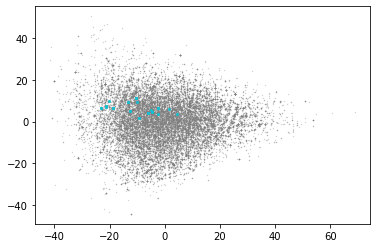

C28


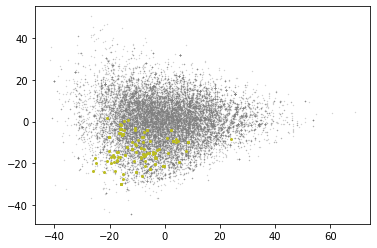

C26


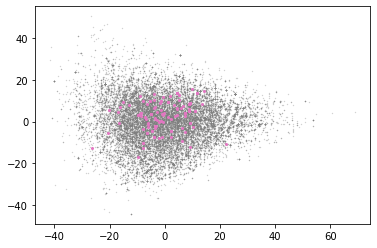

C15


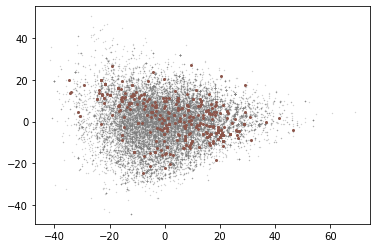

C11


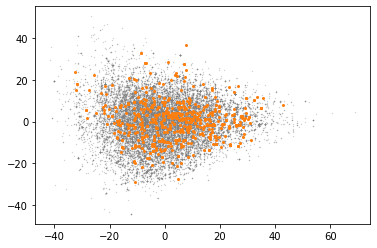

C36


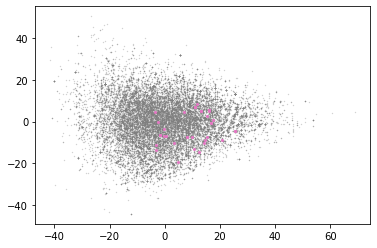

C3


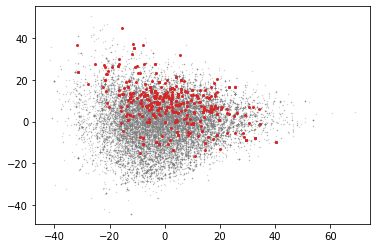

C38


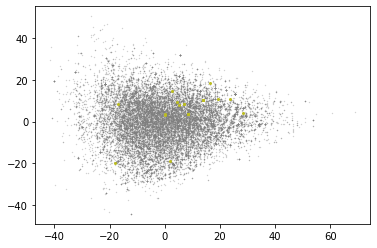

C27


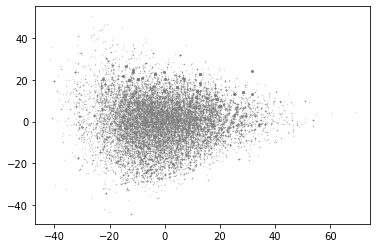

C1


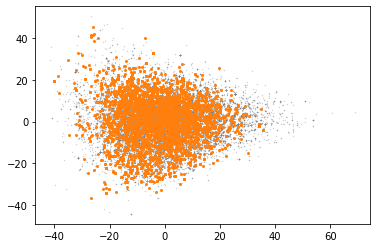

C29


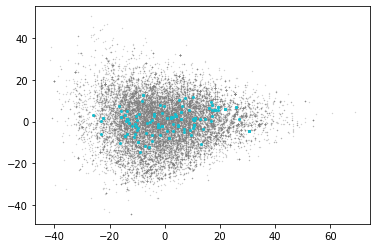

C37


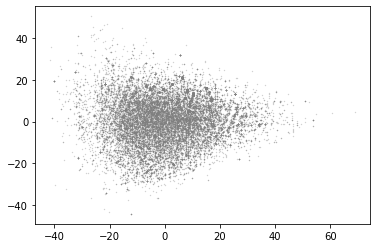

C17


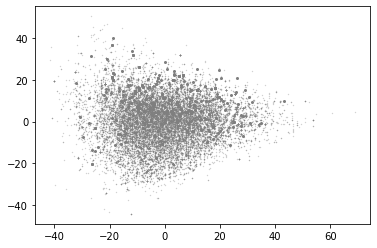

C2


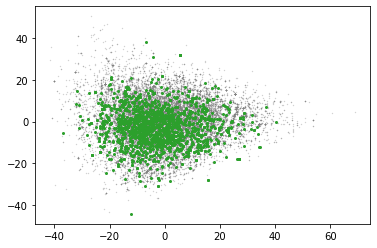

C8


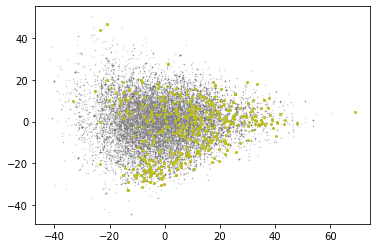

C7


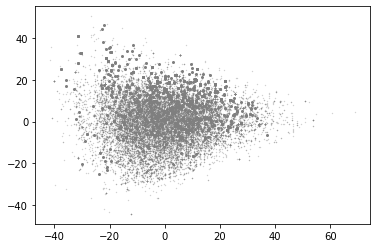

C6


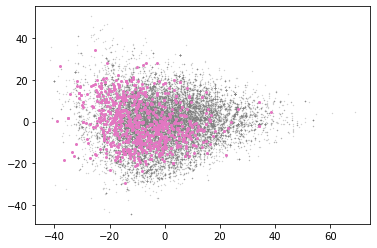

C19


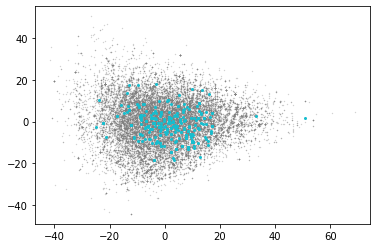

C33


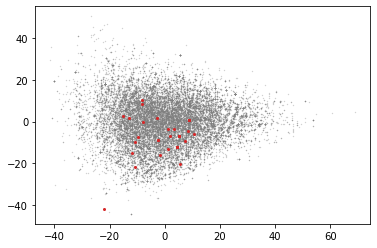

C25


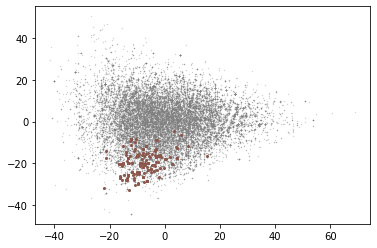

C45


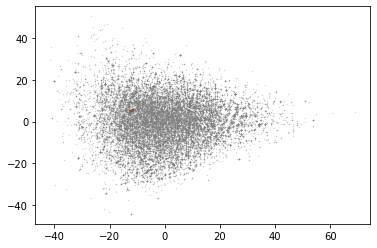

C4


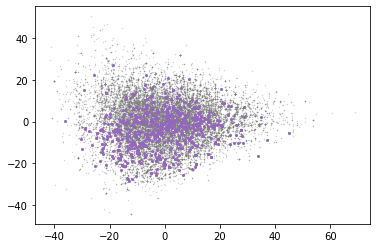

C21


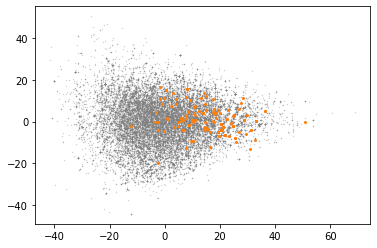

C13


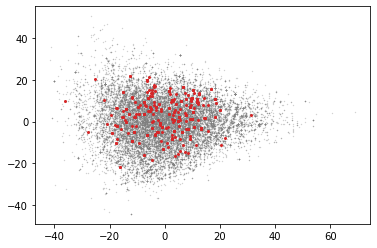

C31


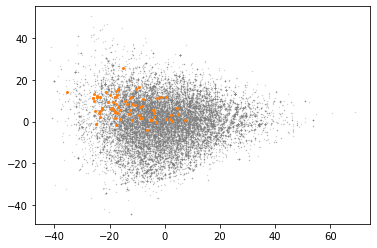

C22


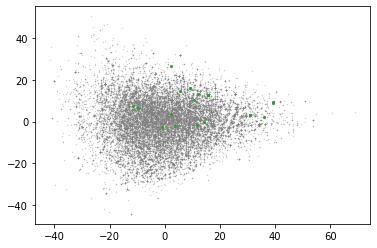

C5


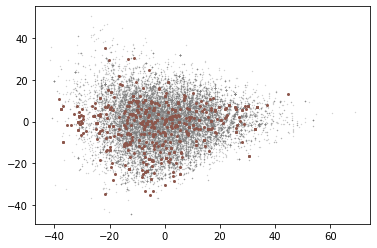

C34


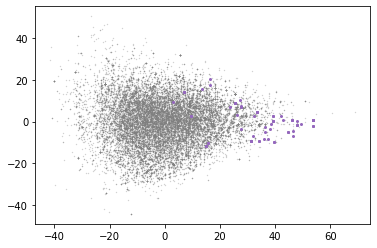

C16


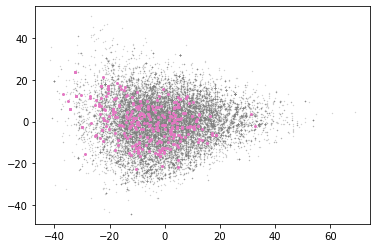

C41


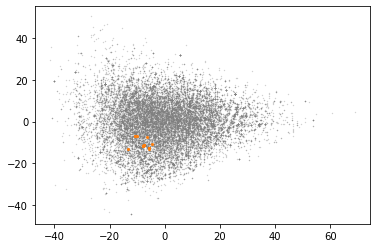

C44


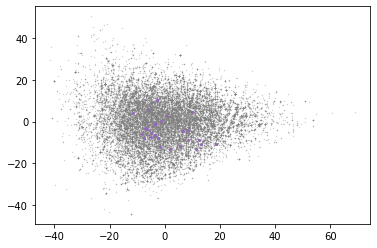

C9


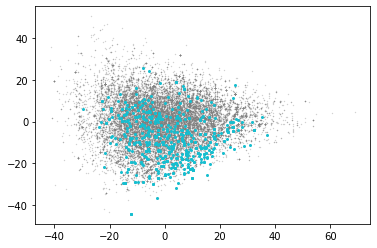

C43


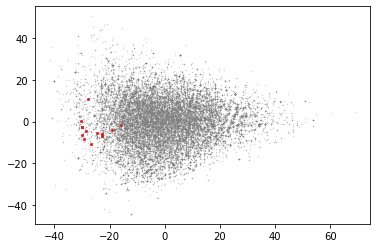

C35


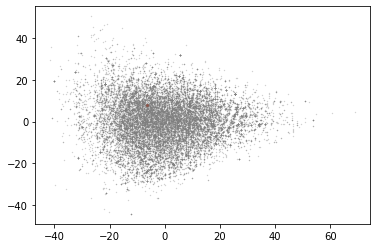

C40


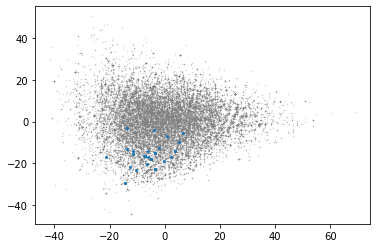

C30


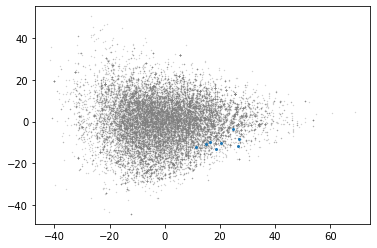

C23


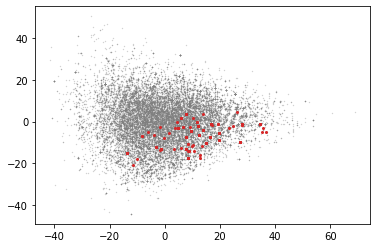

C0


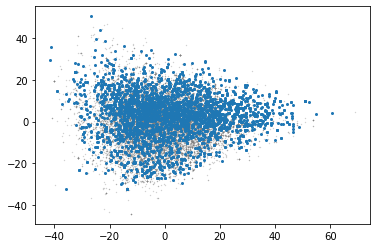

C12


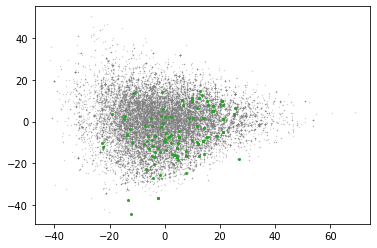

C18


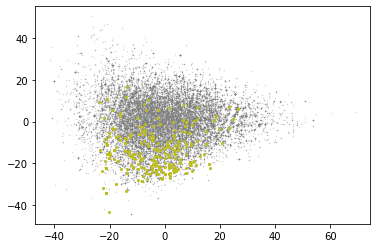

C14


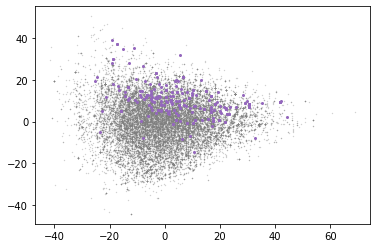

C32


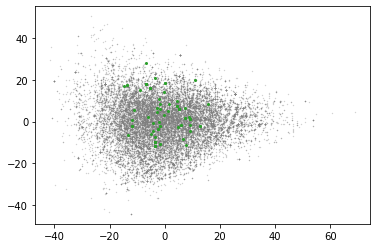

C24


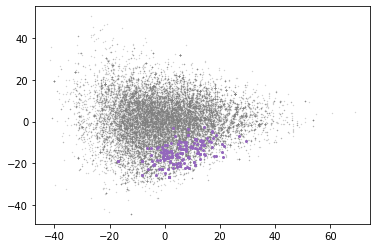

C10


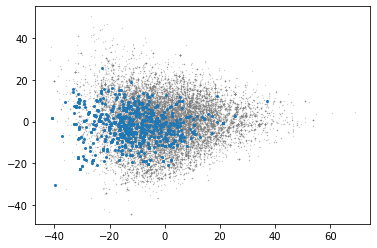

C20


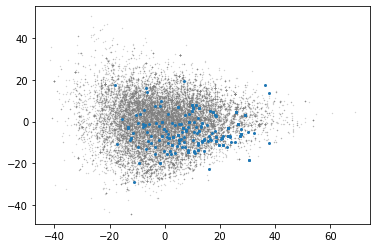

In [287]:
myata_PCA=pd.DataFrame({'id':[i for i in CLU],'x':[principal_df.loc[i]['PC1'] for i in CLU],'y':[principal_df.loc[i]['PC2'] for i in CLU],'c':[CLU[i] for i in CLU]})
for i in set(CLU.values()):
    print(i)
    
    my=myata_PCA[myata_PCA['c']==i]


    plt.scatter(myata_PCA['x'],myata_PCA['y'],   c=f'grey',alpha=.5,s=.1)
    plt.scatter(my['x'],my['y'],c=i,s=4)
#     plt.xlim(-0.021,0.03)
#     plt.ylim(-0.021,0.03)
    plt.show()
    

# Cluster Analysis 

In [2]:
myatas={}
for j in [50,200,400,700,1000,1300,1600,3000,4000]:
    for n in [1,2,3]:
        leiden_clusters=cluster_by_connectivity_leiden(embedding_f.values,j,resolution_parameter = n)
        myata=pd.DataFrame({'id':twoD['ID'],'x':twoD['New_x'],'y':twoD['New_y'],'c':leiden_clusters})
        myatas[f"{j}_{n}"]=myata


In [ ]:
lists={}
for i in myatas:
        lists['id']=myatas[i]['id']
        if len(set(myatas[i]['c']))<45:
            lists[f'neighbors_{i}']=myatas[i]['c']

In [ ]:
df_clustering=pd.DataFrame(lists)

In [1290]:
df_clustering

id  neighbors_200_1  \
0      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                0   
1      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                5   
2      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                2   
3      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                2   
4      Raphanus_GCA_029531685.1_APGP_CSIRO_Rrap_0.1_g...                1   
...                                                  ...              ...   
40510  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                5   
40511  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                2   
40512  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                1   
40513  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                2   
40514  Trifolium_GCA_001742945.1_TSUd_r1.1_genomic.fn...                2   

       neighbors_200_2  neighbors_200_3  neighbors_400_1  neighbors_400_2  \
0                    0                0                1                0   
1                    8               11                5                5   
2                    1                1                6                8   
3                   17               24                0                2   
4                    2               10                2                1   
...                ...              ...              ...              ...   
40510                8               14                5                5   
40511                1                1                0                2   
40512                5                4                2                6   
40513                1               14                6                8   
40514                1                1                0                2   

       neighbors_400_3  neighbors_700_1  neighbors_700_2  neighbors_700_3  \
0                    0                1                0                0   
1                   11                5                6                6   
2                    5                6                8                5   
3                   16                0                2               15   
4                    1                2                1                2   
...                ...              ...              ...              ...   
40510               17                5                6                6   
40511                4                0                2                9   
40512                3                0                7                4   
40513                5                6                8                5   
40514               12                0                2               14   

       ...  neighbors_1600_1  neighbors_1600_2  neighbors_1400_1  \
0      ...                 2                 0                 2   
1      ...                 1                 6                 1   
2      ...                 4                 7                 4   
3      ...                 0                 2                 0   
4      ...                 1                 1                 1   
...    ...               ...               ...               ...   
40510  ...                 1                 6                 1   
40511  ...                 0                 4                 0   
40512  ...                 0                10                 0   
40513  ...                 4                 7                 4   
40514  ...                 0                 4                 0   

       neighbors_1500_1  neighbors_1700_1  neighbors_1800_1  neighbors_1900_1  \
0                     2                 2                 2                 2   
1                     1                 1                 1                 1   
2                     4                 0                 0                 0   
3                     0                 0                 0                 0   
4                     1                 1                

In [ ]:
df_clustering.to_csv("./clustering_results_PHATE_all_info_new.csv")


The resulting Clusterign will be then processed in a R script (see scr)

In [182]:
from Bio import Phylo
from ete3 import Tree


In [302]:
seqs=list(SeqIO.parse('./CLE_run_6.seq.fasta','fasta'))

In [304]:
seqs_names=[str(i.id) for i in seqs]

In [309]:
len(seqs_names)

43482

In [1410]:
dada=result#pd.read_csv('./clustering_results.csv')
# dada=dada.set_index('names', drop=True)
dada_c={i:f'Cluster_3{j}' for i,j in zip(dada['ID'],df_clustering['neighbors_200_3'])}

In [1412]:
dada_c_r={v:[] for v in dada_c.values()}
for i in dada_c:
    if i in evaluation:
        dada_c_r[dada_c[i]].append(evaluation[i][-1][-1])

In [1209]:
# dada_c_r

In [339]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import random


In [378]:
def Per_test(clade1,clade2):
    group1 = dada_c_r[clade1]
    group2 =dada_c_r[clade2]
    if len(group1)==0:
        p_value=1
        return p_value
    if len(group2)==0:
        p_value=1
        return p_value
    all_characters = set(''.join(group1 + group2))
    le = LabelEncoder()
    le.fit(list(all_characters))
    def encode_data(data, encoder):
        return np.array([encoder.transform(list(item)) for item in data])

    # Encode both groups
    X1 = encode_data(group1, le)
    X2 = encode_data(group2, le)
    X = np.vstack((X1, X2))
    y = np.array([0]*len(X1) + [1]*len(X2))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

    # Train classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Evaluate classifier
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Permutation test
    n_permutations = 1000
    perm_accuracies = []

    for _ in range(n_permutations):
        y_perm = np.random.permutation(y_test)
        y_perm_pred = clf.predict(X_test)
        perm_accuracies.append(accuracy_score(y_perm, y_perm_pred))

    # Compute p-value
    p_value = np.mean(np.array(perm_accuracies) >= accuracy)
    return p_value

In [353]:
print(f"Original Accuracy: {accuracy}")
print(f"P-value: {p_value}")

Original Accuracy: 0.9436619718309859
P-value: 0.0


In [689]:
from ete3 import Tree


In [758]:
# Initialize a counter for internal node names


def add_internal_node_names(node):
    global internal_node_counter
    if not node.is_leaf():
        if len(node.children) == 1:
            # If the node has only one child, merge it with the child
            child = node.children[0]
            add_internal_node_names(child)
            if child.is_leaf() and child.name.startswith("Cluster"):
                node.name = f"{node.name}{child.name}"
            else:
                node.name = f"{node.name}_{child.name}"
            node.children = child.children
        else:
            node.name = f"INT{internal_node_counter}"
            internal_node_counter += 1
            for child in node.children:
                add_internal_node_names(child)
# Add internal node names

# print(tree.get_ascii())

In [1407]:
tree = Tree("New_tree_fixed.newick")

internal_node_counter = 1
add_internal_node_names(tree)
normalized_tree = normalize_node_names(tree)


In [759]:
def trace_to_root(node):
    path = []
    while node.up:
        path.append(node)
        node = node.up
    return path

def find_intermediate_nodes(tree, node1_name, node2_name):
    node1 = tree.search_nodes(name=node1_name)[0]
    node2 = tree.search_nodes(name=node2_name)[0]

    # Get paths to root for both nodes
    path1 = trace_to_root(node1)
    path2 = trace_to_root(node2)

    # Find least common ancestor by checking where paths intersect
    common_ancestors = set(path1) & set(path2)
    if len(common_ancestors)>0:
        lca = max(common_ancestors, key=lambda node: node.get_distance(tree))
   
    # Exclude LCA and collect nodes in path up to but not including LCA
        intermediate_nodes = [n.name for n in path1 if n not in common_ancestors and n != node1] + \
                         [n.name for n in path2 if n not in common_ancestors and n != node2]
    else:
        intermediate_nodes=['NONE']
    return intermediate_nodes
def find_sister_leaves(tree):
    pairs=[]
    for child in [i for i in tree.iter_leaves()]:
        if child.is_leaf():
            sister_leaves = [leaf for leaf in tree.get_leaves() if leaf != child]
            for leaf in  sister_leaves:
                paths=find_intermediate_nodes(tree,child.name,leaf.name)
                if len(paths)==0:
                    if tuple(sorted((child.name, leaf.name))) not in pairs:
                        pairs.append(tuple(sorted((child.name, leaf.name))))

    return pairs

In [1414]:
# Function to find sister leaves and generate internal node names

pairs = find_sister_leaves(normalized_tree)

In [1417]:
pairs

[('Cluster_30', 'Cluster_331'),
 ('Cluster_30', 'Cluster_319'),
 ('Cluster_319', 'Cluster_331'),
 ('Cluster_317', 'Cluster_327'),
 ('Cluster_325', 'Cluster_327'),
 ('Cluster_317', 'Cluster_325'),
 ('Cluster_310', 'Cluster_37'),
 ('Cluster_323', 'Cluster_34'),
 ('Cluster_311', 'Cluster_314'),
 ('Cluster_31', 'Cluster_313'),
 ('Cluster_315', 'Cluster_33'),
 ('Cluster_321', 'Cluster_35'),
 ('Cluster_316', 'Cluster_328'),
 ('Cluster_316', 'Cluster_329'),
 ('Cluster_316', 'Cluster_324'),
 ('Cluster_312', 'Cluster_320'),
 ('Cluster_328', 'Cluster_329'),
 ('Cluster_324', 'Cluster_328'),
 ('Cluster_324', 'Cluster_329'),
 ('Cluster_318', 'Cluster_38')]

In [1416]:
# pairs

In [583]:
# from itertools import combinations

# def process_pairs(pairs):
#     processed_pairs = []

#     for pair in pairs:
#         leaf, sisters = pair
#         if len(sisters) == 1:
#             processed_pairs.append((leaf, sisters[0]))
#         else:
#             for sister in sisters:
#                 processed_pairs.append((leaf, sister))
#                 processed_pairs.append((sister, leaf))

#     # Remove redundant tuples
#     processed_pairs = list(set(tuple(sorted(pair)) for pair in processed_pairs))

#     return processed_pairs

In [424]:
# processed_pairs = process_pairs(pairs)


In [1418]:
p_tests={}
for i in pairs:
    p=Per_test(i[0],i[1])
    print(i,p)
    p_tests[i]=p

('Cluster_30', 'Cluster_331') 0.0
('Cluster_30', 'Cluster_319') 0.0
('Cluster_319', 'Cluster_331') 0.0
('Cluster_317', 'Cluster_327') 0.0
('Cluster_325', 'Cluster_327') 0.0
('Cluster_317', 'Cluster_325') 0.0
('Cluster_310', 'Cluster_37') 0.0
('Cluster_323', 'Cluster_34') 0.0
('Cluster_311', 'Cluster_314') 0.0
('Cluster_31', 'Cluster_313') 0.0
('Cluster_315', 'Cluster_33') 0.0
('Cluster_321', 'Cluster_35') 0.0
('Cluster_316', 'Cluster_328') 0.0
('Cluster_316', 'Cluster_329') 0.0
('Cluster_316', 'Cluster_324') 0.0
('Cluster_312', 'Cluster_320') 0.0
('Cluster_328', 'Cluster_329') 0.0
('Cluster_324', 'Cluster_328') 0.0
('Cluster_324', 'Cluster_329') 0.0
('Cluster_318', 'Cluster_38') 0.0


In [762]:
def find_ancestor_node(cluster1, cluster2, tree):
    # Find the nodes corresponding to the clusters
    node1 = tree.search_nodes(name=cluster1)[0]
    node2 = tree.search_nodes(name=cluster2)[0]
    
    # Find the closest ancestor node
    ancestor_node = node1.get_common_ancestor(node2)
    
    return ancestor_node.name

merged_clusters = {}

# Populate merged_clusters based on p_tests
for pair, value in p_tests.items():
    if value > 0.05:
        # Find the closest ancestor node for the pair
        ancestor_node = find_ancestor_node(pair[0], pair[1], tree)
        
        # Add the pair to the merged_clusters dictionary
        if ancestor_node not in merged_clusters:
            merged_clusters[ancestor_node] = []
        merged_clusters[ancestor_node].append(pair)
merged_clusters={k:list(set([i for j in merged_clusters[k] for i in j])) for k in merged_clusters}

In [766]:
def normalize_node_names(tree):
    for node in tree.traverse():
        # If node name starts with one or more underscores followed by 'INT'
        if node.name.startswith("_INT"):
            # Remove all leading underscores
            node.name = node.name.lstrip("_")
        elif node.name.startswith("__INT"):
            # Remove all leading underscores
            node.name = node.name.lstrip("__")
    return tree

In [607]:
def prune_and_modify_tree(tree, merged_clusters):
    for node_name, clusters_to_merge in merged_clusters.items():
        # Search for nodes by name
        found_nodes = tree.search_nodes(name=node_name)
        if not found_nodes:
            print(f"No node found with the name: {node_name}")
            continue
        common_ancestor = found_nodes[0]

        # Find all descendant leaf nodes of the common ancestor
        all_descendants = set([leaf.name for leaf in common_ancestor.iter_leaves()])

        # Set of clusters that need to be merged
        clusters_set = set(clusters_to_merge)

        if all_descendants == clusters_set:
            # If all descendants are to be merged, prune them and replace with a new node
            common_ancestor.delete()  # Removes the node and its children
            parent = common_ancestor.up
            if parent:
                parent.add_child(name=f"{node_name}_new")
        else:
            # If only some descendants are to be merged, detach them and create a new intermediate node
            new_node = common_ancestor.add_child(name=f"{node_name}_new")
            for desc in list(common_ancestor.iter_descendants()):
                if desc.is_leaf() and desc.name in clusters_set:
                    desc.detach()  # This removes the node from the tree
                    new_node.add_child(name=desc.name)

    return tree


In [627]:
# for node in normalized_tree.traverse():
#     print(node.name)
#     node_nam=str(node.name)
# #     print(tree.search_nodes(name=node_nam)[0])

In [632]:
# for i in merged_clusters:
#     print(i)
#     found_nodes = normalized_tree.search_nodes(name=i)
#     print(found_nodes)

In [769]:
from ete3 import Tree

def calculate_distance_from_root(tree, nodes):
    distances = {}
    for node_name in nodes:
        # Normalize node names if necessary (strip leading underscores)
        node_name = node_name.lstrip('_')
        
        # Search for the node in the tree
        found_nodes = tree.search_nodes(name=node_name)
        if found_nodes:
            node = found_nodes[0]
            # Calculate the distance from the node to the root
            distance = node.get_distance(tree)
            distances[node_name] = distance
        else:
            print(f"No node found with the name: {node_name}")
            distances[node_name] = "Node not found"
    
    return distances
def sort_distances_by_value(distances):
    # Sort the distances dictionary by value in descending order
    sorted_distances = sorted(distances.items(), key=lambda x: x[1], reverse=True)
    return sorted_distances

merged_clusters_keys = list(merged_clusters.keys())
# Calculate distances from root for specified nodes
distances_from_root = calculate_distance_from_root(tree, merged_clusters_keys)
sorted_distances_from_root = sort_distances_by_value(distances_from_root)



In [992]:
# def prune_clusters_and_adjust_ancestor(tree, clusters_to_prune, ancestor_node_name):
#     ancestor_node = tree.search_nodes(name=ancestor_node_name)[0]

#     # Prune specified clusters
#     for cluster_name in clusters_to_prune:
#         found_cluster = tree.search_nodes(name=cluster_name)
#         if found_cluster:
#             found_cluster[0].detach()

#     # Check if the ancestor node has any leaf children left
#     leaf_children = [child for child in ancestor_node.children if child.is_leaf()]

#     if not leaf_children:
#         # If no leaf children, replace the ancestor node with a new leaf node
#         ancestor_node.delete()  # Deletes the node and its children if any
#         parent = ancestor_node.up
#         if parent:
#             # Add a new leaf node where the old one was
#             parent.add_child(name=f"{ancestor_node_name}_NEW")
#     else:
#         # If there are leaf children, add a new sister leaf node
#         ancestor_node.add_child(name=f"{ancestor_node_name}_NEW")

#     return tree
def prune_clusters_and_adjust_ancestor(tree, clusters_to_prune, ancestor_node_name,rounds=''):
    ancestor_node = tree.search_nodes(name=ancestor_node_name)[0]
    print(f'Pruning at {ancestor_node_name}')
    # Prune specified clusters
    for cluster_name in clusters_to_prune:
        found_cluster = tree.search_nodes(name=cluster_name)
        if found_cluster:
            print(f'Removing {cluster_name}')
            found_cluster[0].detach()

    # Check if the ancestor node has any leaf children left
    leaf_children = [i for i in list_all_subtree_nodes(tree,ancestor_node_name) if i.name!=ancestor_node_name]

    if not leaf_children:
        # If no leaf children, simply change the name and clear any non-leaf children
        ancestor_node.name = f"{ancestor_node_name}_NEW{rounds}".replace('INT','Cluster_')
        # Ensure there are no non-leaf children remaining
        for child in list(ancestor_node.children):
            if not child.is_leaf():
                child.detach()  # Detach non-leaf children if any (usually there shouldn't be any)
    else:
        # If there are leaf children, add a new sister leaf node
        ancestor_node.add_child(name=f"{ancestor_node_name}_NEW{rounds}".replace('INT','Cluster_'))

    return tree

In [820]:
def list_all_subtree_nodes(tree, ancestor_node_name):
    # Find the ancestor node by name
    ancestor_node = tree.search_nodes(name=ancestor_node_name)[0]

    # List all nodes downstream of the ancestor node, including the ancestor itself
    subtree_nodes = [node for node in ancestor_node.traverse()]

    return subtree_nodes

In [902]:
r=0
str(r+1)

'1'

In [825]:
# merged_clusters
new_clusters={}
copied_tree = normalized_tree.copy()
for a,b in sorted_distances_from_root:
    new_clusters[a.replace('INT','Cluster_')+'_NEW']=[]
    _=[i.name for i in copied_tree.traverse()]
    copied_tree = prune_clusters_and_adjust_ancestor(copied_tree, merged_clusters[a], a)
    __=[i for i in _ if i not in [i.name for i in copied_tree.traverse()]]
    new_clusters[a.replace('INT','Cluster_')+'_NEW'].extend(merged_clusters[a])
    


In [868]:
# new_clusters

In [827]:
# print(copied_tree.get_ascii())
pairs=find_sister_leaves(copied_tree)

In [941]:
def Per_test_post(clade1,clade2,new_clusters,n_permutations = 1000):
    if len(new_clusters)> 0:
        if clade1 in new_clusters:
            group1=[j for i in new_clusters[clade1] for j in dada_c_r[i]]
        else:
            group1 = dada_c_r[clade1]
        if clade2 in new_clusters:
            group2=[j for i in new_clusters[clade2] for j in dada_c_r[i]]
        else:
            group2 = dada_c_r[clade2]
    else:
        group1 = dada_c_r[clade1]
        group2 = dada_c_r[clade2]
    if len(group1)==0:
        p_value=1
        return p_value
    if len(group2)==0:
        p_value=1
        return p_value
    all_characters = set(''.join(group1 + group2))
    le = LabelEncoder()
    le.fit(list(all_characters))
    def encode_data(data, encoder):
        return np.array([encoder.transform(list(item)) for item in data])

    # Encode both groups
    X1 = encode_data(group1, le)
    X2 = encode_data(group2, le)
    X = np.vstack((X1, X2))
    y = np.array([0]*len(X1) + [1]*len(X2))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

    # Train classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Evaluate classifier
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Permutation test
    
    perm_accuracies = []

    for _ in range(n_permutations):
        y_perm = np.random.permutation(y_test)
        y_perm_pred = clf.predict(X_test)
        perm_accuracies.append(accuracy_score(y_perm, y_perm_pred))

    # Compute p-value
    p_value = np.mean(np.array(perm_accuracies) >= accuracy)
    return p_value

In [839]:
p_tests={}
for i in pairs:
    p=Per_test_post(i[0],i[1],new_clusters)
    print(i,p)
    p_tests[i]=p

('Cluster_0', 'Cluster_14') 0.004
('Cluster_50', 'Cluster_55') 0.065
('Cluster_56', 'Cluster_6_NEW') 0.0
('Cluster_18', 'Cluster_8_NEW') 0.291
('Cluster_11_NEW', 'Cluster_34') 0.0
('Cluster_58', 'Cluster_9') 0.02
('Cluster_62', 'Cluster_9') 0.0
('Cluster_58', 'Cluster_62') 0.0
('Cluster_12', 'Cluster_3') 0.002
('Cluster_18_NEW', 'Cluster_49') 0.596
('Cluster_31', 'Cluster_35') 0.001
('Cluster_20', 'Cluster_21_NEW') 0.361
('Cluster_24_NEW', 'Cluster_45') 0.0
('Cluster_11', 'Cluster_46') 0.0
('Cluster_40', 'Cluster_46') 0.0
('Cluster_11', 'Cluster_40') 0.027
('Cluster_28', 'Cluster_4') 0.001
('Cluster_29_NEW', 'Cluster_8') 0.002
('Cluster_31_NEW', 'Cluster_48') 0.301


In [841]:
def find_ancestor_node(cluster1, cluster2, tree):
    # Find the nodes corresponding to the clusters
    node1 = tree.search_nodes(name=cluster1)[0]
    node2 = tree.search_nodes(name=cluster2)[0]
    
    # Find the closest ancestor node
    ancestor_node = node1.get_common_ancestor(node2)
    
    return ancestor_node.name

merged_clusters = {}

# Populate merged_clusters based on p_tests
for pair, value in p_tests.items():
    if value > 0.05:
        # Find the closest ancestor node for the pair
        ancestor_node = find_ancestor_node(pair[0], pair[1], copied_tree)
        
        # Add the pair to the merged_clusters dictionary
        if ancestor_node not in merged_clusters:
            merged_clusters[ancestor_node] = []
        merged_clusters[ancestor_node].append(pair)
merged_clusters={k:list(set([i for j in merged_clusters[k] for i in j])) for k in merged_clusters}

In [853]:
merged_clusters_keys = list(merged_clusters.keys())
# Calculate distances from root for specified nodes
distances_from_root = calculate_distance_from_root(tree, merged_clusters_keys)
sorted_distances_from_root = sort_distances_by_value(distances_from_root)
merged_clusters

{'INT4': ['Cluster_55', 'Cluster_50'],
 'INT7': ['Cluster_8_NEW', 'Cluster_18'],
 'INT17': ['Cluster_18_NEW', 'Cluster_49'],
 'INT19': ['Cluster_20', 'Cluster_21_NEW'],
 'INT30': ['Cluster_48', 'Cluster_31_NEW']}

In [890]:
new_clusters_round2={}
copied_tree_2 = copied_tree.copy()
for a,b in sorted_distances_from_root:
    r=2
    new_clusters_round2[a.replace('INT','Cluster_')+f'_NEW{2}']=[]
    copied_tree_2 = prune_clusters_and_adjust_ancestor(copied_tree_2, merged_clusters[a], a,rounds='2')
    new_clusters_round2[a.replace('INT','Cluster_')+f'_NEW{2}'].extend([j for i in merged_clusters[a] for j in (new_clusters[i] if new_clusters.get(i) else [i])])


['Cluster_48', 'Cluster_31_NEW']

In [923]:
a

'INT30'

In [889]:
[j for i in merged_clusters[a] for j in (new_clusters[i] if new_clusters.get(i) else [i])]


['Cluster_48', 'Cluster_63', 'Cluster_57', 'Cluster_30']

In [883]:
merged_clusters['INT30']

['Cluster_48', 'Cluster_31_NEW']

In [1037]:
# print(copied_tree_2.get_ascii())

# I am here 

In [1029]:
def Per_andPruning(tree):
    r = 0
    flag = False
    ct = tree.copy()
    
    p_tests = {}
    merged_clusters = {}
    new_clusters = {}
    trees={}
    trees[r]=ct
    while not flag:
#         new_clusters = {}
        print(f'Round {r}')
        pairs = find_sister_leaves(ct)
        p_tests[r] = {}
        print('\tPerforming Permutation Test')
        for i in pairs:
            
            
            p = Per_test_post(i[0], i[1], new_clusters,n_permutations = 1000)
            p_tests[r][i] = p
            if p > 0.05:
                print(f'pair: {i[0]} and {i[1]} has p-value={p}')
#             print(f'')

        merged_clusters[r] = {}
        for pair, value in p_tests[r].items():
            if value > 0.05:
                ancestor_node = find_ancestor_node(pair[0], pair[1], ct)
                if ancestor_node not in merged_clusters[r]:
                    merged_clusters[r][ancestor_node] = []
                merged_clusters[r][ancestor_node].append(pair)

        merged_clusters[r] = {k: list(set([i for j in merged_clusters[r][k] for i in j])) for k in merged_clusters[r]}

        if merged_clusters[r]:
            print(f'Merging {len(merged_clusters[r])} clusters')
        else:
            flag = True
            continue

        merged_clusters_keys = list(merged_clusters[r].keys())
        distances_from_root = calculate_distance_from_root(ct, merged_clusters_keys)
        sorted_distances_from_root = sort_distances_by_value(distances_from_root)
        
        ct = ct.copy()
        suffix = str(r+1)
        for a, b in sorted_distances_from_root:
            new_cluster_key = a.replace('INT', 'Cluster_') + f'_NEW{suffix}'
            if new_cluster_key not in new_clusters:
                new_clusters[new_cluster_key] = []
                new_clusters[new_cluster_key].extend([j for i in merged_clusters[r][a] for j in (new_clusters.get(i, [i]))])

            ct = prune_clusters_and_adjust_ancestor(ct, merged_clusters[r][a], a, rounds=suffix)
            
            
        trees[r]=ct
        
#         new_clusters.update(new_clusters[r-1])

        r += 1
    return trees,merged_clusters,new_clusters


In [1423]:
# new_trees,merged_clusters,new_clusters=Per_andPruning(normalized_tree)

In [1222]:
inv_clusters = {i: set() for k, v in new_clusters.items() for i in v}
for k, v in new_clusters.items():
    for i in v:
        inv_clusters[i].add(k)

# Create the final mapping of items to their selected cluster based on specific criteria
new_clusters_r = {
    k: v.pop() if len(v) == 1 else sorted(v, key=lambda x: x[-1])[-1]
    for k, v in inv_clusters.items()
}

In [1223]:
new_clusters

{'Cluster_8_NEW1': ['Cluster_5', 'Cluster_46'],
 'Cluster_3_NEW1': ['Cluster_0', 'Cluster_74', 'Cluster_53'],
 'Cluster_7_NEW2': ['Cluster_5', 'Cluster_46', 'Cluster_70']}

In [1224]:
new_clusters_r

{'Cluster_5': 'Cluster_7_NEW2',
 'Cluster_46': 'Cluster_7_NEW2',
 'Cluster_0': 'Cluster_3_NEW1',
 'Cluster_74': 'Cluster_3_NEW1',
 'Cluster_53': 'Cluster_3_NEW1',
 'Cluster_70': 'Cluster_7_NEW2'}

In [1225]:
dada_c_updated={}
for i in dada_c:
    if dada_c[i] in new_clusters_r:
        dada_c_updated[i]=new_clusters_r[dada_c[i]]
    else:
        dada_c_updated[i]=dada_c[i]

In [1227]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
dada_c_updated_colors={i:f"C{j}" for i,j in zip(dada_c_updated.keys(),label_encoder.fit_transform(list(dada_c_updated.values())))}


In [1228]:
dada_c_updated_X={k:list(twoD[twoD['ID']==k]['New_x']) for k in dada_c_updated.keys()}

In [46]:
Network_clustering=pd.read_csv('CLEs_Brassica_Round2.filtered.filtered.clusters.csv')

In [63]:
# for i in list(Network_clustering['Seqs']):
#     if i not in list(twoD['ID']):
#         print(f'{i} is missing')
        

In [62]:
# Network_clustering

In [64]:
twoD['Other_clustering']=[list(Network_clustering[Network_clustering['Seqs']==i]['Cluster'])[0] if len(list(Network_clustering[Network_clustering['Seqs']==i]['Cluster']))>0 else -1 for i in list(twoD['ID']) ]
# if x is not None else

In [1685]:
highlight2 = twoD[(twoD['Dodeca'] == 'RGVPAGPDPLHH') | (twoD['Dodeca'] == 'REAPMSPDPLHH')]
highlight2 = highlight2[highlight2['ID'].str.contains('Soletu')]
highlight2.tail(50)

ID     New_x     New_y  \
22818    Soletu1_v1.2.fna_chr2_1929352_1932510.fna  0.008680  0.012771   
22835  Soletu1_v1.2.fna_chr6_55909936_55913055.fna  0.007937  0.012387   

             Dodeca Pos_0 Pos_1 Pos_2 Pos_3 Pos_4 Pos_5 Pos_6 Pos_7 Pos_8  \
22818  RGVPAGPDPLHH     R     G     V     P     A     G     P     D     P   
22835  REAPMSPDPLHH     R     E     A     P     M     S     P     D     P   

      Pos_9 Pos_10 Pos_11  leiden   SP  
22818     L      H      H       5  Yes  
22835     L      H      H       5  Yes

In [1700]:
keys = list(L.keys())
values = list(L.values())

# Shuffle the values
random.shuffle(values)

# Reassign the shuffled values to the keys
shuffled_dict = dict(zip(keys, values))


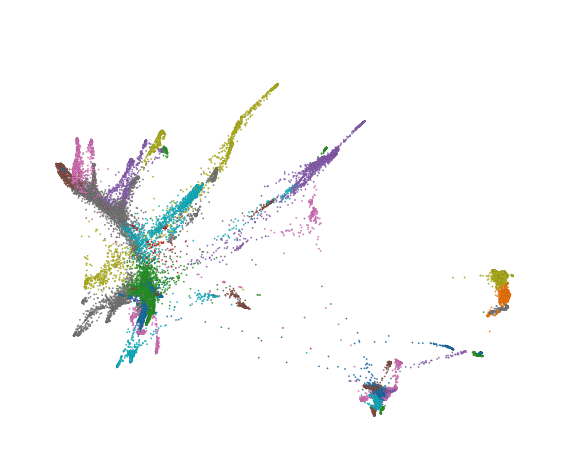

In [1703]:
# Extract UMAP coordinates
umap_coords =[[i,j] for i,j in zip(twoD['New_x'],twoD['New_y'])]
# x1, y1 = 

# Extract colors based on Louvain clustering
colors = [shuffled_dict[int(i)] for n,i in enumerate(list(twoD['leiden']))]#[adata.uns['louvain_colors'][i] for i in list(adata.obs['louvain'])]

# Plot UMAP coordinates
plt.figure(figsize=(10, 8))
plt.scatter(twoD['New_x'],twoD['New_y'], c=colors, s=2.5,edgecolors='black',linewidth=.05)
arrow_length = 1

plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
plt.savefig("./png/leiden_CLE_clustering_New_CLEs.png", dpi=1600, bbox_inches='tight')


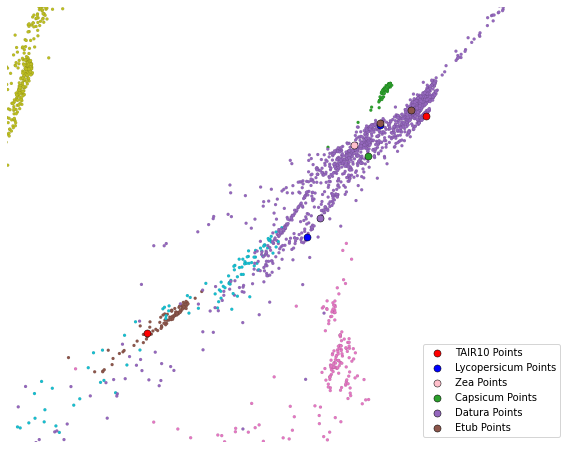

In [1705]:
import matplotlib.pyplot as plt

# Filter for the first set of specific points
highlight1 = twoD[(twoD['Dodeca'] == 'RTVPSGPDPLHH') | (twoD['Dodeca'] == 'RQVPTGSDPLHH')]
highlight1 = highlight1[highlight1['ID'].str.contains('TAIR10')]

# Filter for the second set of specific points
highlight2 = twoD[(twoD['Dodeca'] == 'RGVPAGPDPLHH') | (twoD['Dodeca'] == 'REAPMSPDPLHH')]
highlight2 = highlight2[highlight2['ID'].str.contains('lycopersicum')]





highlight3 = twoD[(twoD['Dodeca']=='RAVPGGPDPLHH')]
highlight3 = highlight3[highlight3['ID'].str.contains('Zea_GCA_024505845')]
highlight4 = twoD[(twoD['Dodeca'] == 'RGVPAGPDPLHH') | (twoD['Dodeca'] == 'REAPMSPDPLHH')]
highlight4 = highlight4[highlight4['ID'].str.contains('Capsicum_GCA_000512255')]
highlight5 = twoD[(twoD['Dodeca'] == 'RGVPAGPDPLHH') | (twoD['Dodeca'] == 'REAPMSPDPLHH')]
highlight5 = highlight5[highlight5['ID'].str.contains('Datura')]

highlight6 = twoD[(twoD['Dodeca'] == 'RGVPAGPDPLHH') | (twoD['Dodeca'] == 'REAPMSPDPLHH')]
highlight6 = highlight6[highlight6['ID'].str.contains('Soletu')]
# Plot all UMAP coordinates
plt.figure(figsize=(10, 8))
plt.scatter(twoD['New_x'], twoD['New_y'], c=colors, s=9.5, edgecolors='black', linewidth=.05)

# Highlight the first set of specific points
plt.scatter(highlight1['New_x'], highlight1['New_y'], c='red', s=50, edgecolors='black', linewidth=0.5, label='TAIR10 Points')

# Highlight the second set of specific points
plt.scatter(highlight2['New_x'], highlight2['New_y'], c='blue', s=50, edgecolors='black', linewidth=0.5, label='Lycopersicum Points')
plt.scatter(highlight3['New_x'], highlight3['New_y'], c='pink', s=50, edgecolors='black', linewidth=0.5, label='Zea Points')
plt.scatter(highlight4['New_x'], highlight4['New_y'], c='C2', s=50, edgecolors='black', linewidth=0.5, label='Capsicum Points')
plt.scatter(highlight5['New_x'], highlight5['New_y'], c='C4', s=50, edgecolors='black', linewidth=0.5, label='Datura Points')
plt.scatter(highlight6['New_x'], highlight6['New_y'], c='C5', s=50, edgecolors='black', linewidth=0.5, label='Etub Points')

# Set limits to zoom in around all highlighted points
all_highlights = pd.concat([highlight1, highlight2])
x_margin = (all_highlights['New_x'].max() - all_highlights['New_x'].min()) * 0.5
y_margin = (all_highlights['New_y'].max() - all_highlights['New_y'].min()) * 0.5
plt.xlim(all_highlights['New_x'].min() - x_margin, all_highlights['New_x'].max() + x_margin)
plt.ylim(all_highlights['New_y'].min() - y_margin, all_highlights['New_y'].max() + y_margin)

# Additional plot settings
plt.axis('off')
plt.legend()
plt.savefig("./png/leiden_CLE_clustering_New_CLEs_FOCUS.pdf", dpi=1600, bbox_inches='tight')

plt.show()


In [1329]:
import sys
sys.path.insert(0, "/grid/lippman/home/igentile/")
from sklearn.cluster import MiniBatchKMeans, KMeans, SpectralClustering
from simlarity_matrix import ClusterSimilarityMatrix, EnsembleCustering

from sklearn.datasets import make_moons, make_blobs
from scipy.sparse.csgraph import connected_components

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [145]:
# for i in [i/1000 for i in list(range(660,670,1))]:
#     MIN_PROBABILITY=i
#     X_vectors=np.vstack([twoD['New_x'], twoD['New_y']])
#     clt_sim_matrix = ClusterSimilarityMatrix()
#     for model in [twoD['leiden'], twoD['louvain'],twoD['Other_clustering']]:
#         clt_sim_matrix.fit(model)
#     sim_matrix = clt_sim_matrix.similarity
#     norm_sim_matrix = sim_matrix/sim_matrix.diagonal()
#     graph = (norm_sim_matrix>MIN_PROBABILITY).astype(int)

#     # Extractin the connected components
#     n_clusters, y_ensemble = connected_components( graph, directed=False, return_labels=True )
#     v=len(set(y_ensemble))
#     print(f'MIN_PROBABILITY value equal to {i} generated {v} clusters')


In [117]:
# data

In [118]:
res_colo = {
    'A': '#CCFF00',  # Alanine
    'R': '#FF0000',  # Arginine
    'N': '#F2BF1C',  # Asparagine
    'D': '#A514DB',  # Aspartic acid
    'C': '#FFFF00',  # Cysteine
    'E': '#66CCFF',  # Glutamic acid
    'Q': '#FF9900',  # Glutamine
    'G': '#99FF00',  # Glycine
    'H': '#0066FF',  # Histidine
    'I': '#66CC00',  # Isoleucine
    'L': '#de425b',  # Leucine
    'K': '#3300FF',  # Lysine
    'M': '#00CCFF',  # Methionine
    'F': '#9900CC',  # Phenylalanine
    'P': '#000000',  # Proline
    'S': '#FFA500',  # Serine
    'T': '#FF6600',  # Threonine
    'W': '#666699',  # Tryptophan
    'Y': '#CC33FF',  # Tyrosine
    'V': '#99CC00'   # Valine
}


In [119]:
twoD=all_data

In [1439]:
# from pyslingshot import Slingshot


In [120]:
from collections import Counter

color_lists = {}

for i in range(12):
    col_name = f'Pos_{i}'
    # If the column exists in the data
#     if col_name in adata.obs.c:
        # Count amino acid occurrences
    amino_acid_counts = Counter(twoD[col_name])

    # Get the 3 most common amino acids
    top_3_amino_acids = [item[0] for item in amino_acid_counts.most_common(3)]

#     # Create a color list for this column
    color_list = [res_colo[aa] if aa in top_3_amino_acids else 'grey' for aa in twoD[col_name]]
    color_lists[col_name] = color_list


In [124]:
# twoD

In [125]:
# merged_df = pd.merge(df_clustering, twoD, left_on='id', right_on='ID', how='inner')


In [126]:
merged_df=all_data

In [127]:
merged_df['Color_P0']=color_lists['Pos_0']

In [128]:
merged_df['Color_P11']=color_lists['Pos_11']

In [129]:
merged_df['Color_P9']=color_lists['Pos_9']

In [130]:
merged_df['Color_P7']=color_lists['Pos_7']

In [131]:
merged_df['Color_P2']=color_lists['Pos_2']
merged_df['Color_P1']=color_lists['Pos_1']

merged_df['Color_P6']=color_lists['Pos_6']

In [132]:
merged_df['Color_P6']=color_lists['Pos_6']

In [133]:
merged_df['Color_P8']=color_lists['Pos_8']

In [134]:
sub=merged_df[(merged_df['neighbors_1900_1']==0) | (merged_df['neighbors_1900_1']==2)| (merged_df['neighbors_1900_1']==1)]


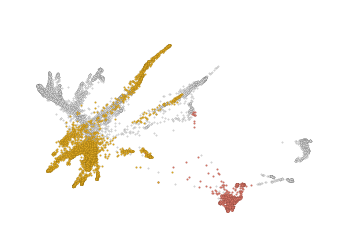

In [146]:
# Your data filtering

sub1 = merged_df[merged_df['neighbors_200_3'].isin([13, 1])]
sub2 = merged_df[merged_df['neighbors_200_3'].isin([24, 29, 28, 16, 12, 20, 21, 5])]
sub3 = merged_df[merged_df['neighbors_200_3'].isin([15, 3])]
IDs=list(set(list(sub1['id'])+list(sub2['id'])+list(sub3['id'])))
sub = merged_df[merged_df['neighbors_1600_2'] == 0]
IDs_all=list(set(list(sub['id'])+IDs))

sub2 = merged_df[merged_df['id'].isin(IDs)]
t_ = merged_df[~merged_df['id'].isin(IDs_all)]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plotting the main data points
ax.scatter(t_['New_x'], t_['New_y'], c='lightgrey', s=2.5, edgecolors='black', linewidth=0.05)

# Plotting the subset
ax.scatter(sub['New_x'], sub['New_y'], c='#D47264', s=3.5, edgecolors='black', linewidth=0.05)
ax.scatter(sub2['New_x'], sub2['New_y'], c='goldenrod', s=3.5, edgecolors='black', linewidth=0.05)

# Setting the limits and properties of the plot
ax.set_xlim(-0.021, 0.03)
ax.set_ylim(-0.021, 0.03)
ax.axis('off')
plt.savefig("./Clusters_fig5_colored.pdf", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

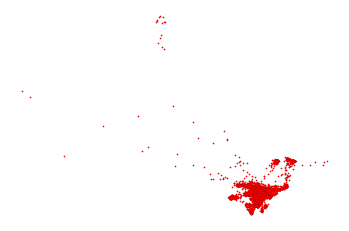

In [1579]:
sub=merged_df[merged_df['neighbors_1600_2']==0]

# t_=merged_df[~merged_df['id'].isin(sub['id'])]
# plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c='red', s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
# plt.xlim(-0.021,0.03)
# plt.ylim(-0.021,0.03)
plt.axis('off')
plt.savefig("./neighbors_1600_2_alone.png", dpi=1000, bbox_inches='tight')
plt.show()

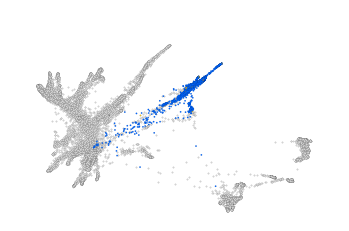

In [1545]:
sub=merged_df[merged_df['neighbors_1600_1']==4]

t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P11'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./Alternative_neighbors_1900_3_N_vs_H_dodeca_new_pos_11.png", dpi=1000, bbox_inches='tight')
plt.show()

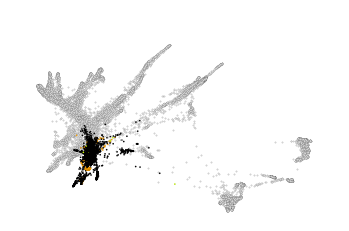

In [1603]:
# sub=merged_df[merged_df['neighbors_400_1']==0]

# t_=merged_df[~merged_df['id'].isin(sub['id'])]
# plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

# plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P6'], s=2.5,edgecolors='black',linewidth=.05)
# # ax.set_title(f'Dodecapeptide Position {i+1}')
        
# plt.xlim(-0.021,0.03)
# plt.ylim(-0.021,0.03)
# plt.axis('off')
# # plt.savefig("./Alternativeneighbors_400_1_P_vs_S_dodeca_new_pos_7.png", dpi=1000, bbox_inches='tight')
# plt.show()

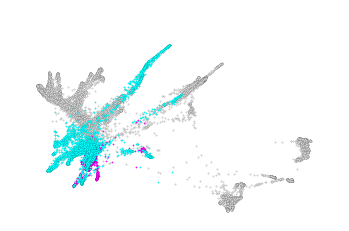

In [1617]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample merged_df dataframe
# Note: Replace this with your actual data loading mechanism
# merged_df = ...

# Creating sub1 and sub2 dataframes
sub1 = merged_df[merged_df['neighbors_200_3'].isin([15, 1, 13, 3])]
sub2 = merged_df[merged_df['neighbors_200_3'].isin([24, 29, 28, 16, 12, 20, 21, 5])]

# Combining the sub dataframes
sub = pd.concat([sub1, sub2])

# Creating the t_ dataframe with rows not in the sub dataframe
t_ = merged_df[~merged_df['id'].isin(sub['id'])]

# Mapping colors for sub['Color_P1']
color_mapping = {
    '#66CC00': 'magenta',  # Replace '#66CC00' with 'magenta'
    '#de425b': 'magenta'   # Replace '#de425b' with 'magenta'
}
# Set default color to 'cyan' for other values
sub['Mapped_Color'] = sub['Color_P1'].map(lambda x: color_mapping.get(x, 'cyan'))

# Separating data for 'magenta' and 'cyan' points
sub_magenta = sub[sub['Mapped_Color'] == 'magenta']
sub_cyan = sub[sub['Mapped_Color'] == 'cyan']

# Plotting the scatter plots
plt.scatter(t_['New_x'], t_['New_y'], c='lightgrey', s=2.5, edgecolors='black', linewidth=0.05)
plt.scatter(sub_magenta['New_x'], sub_magenta['New_y'], c='magenta', s=2.5, edgecolors='black', linewidth=0.05)
plt.scatter(sub_cyan['New_x'], sub_cyan['New_y'], c='cyan', s=2.5, edgecolors='black', linewidth=0.05)

# Setting plot limits and axis off
plt.xlim(-0.021, 0.03)
plt.ylim(-0.021, 0.03)
plt.axis('off')
# plt.savefig("./Alternativeneighbors_1000_1_0_1_loss_L_dodeca_new_pos_2.png", dpi=1000, bbox_inches='tight')

# Displaying the plot
plt.show()


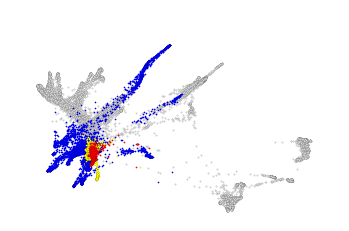

In [1733]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample merged_df dataframe
# Note: Replace this with your actual data loading mechanism
# merged_df = ...

# Creating sub1 and sub2 dataframes
sub1 = merged_df[merged_df['neighbors_200_3'].isin([13, 1])]
sub2 = merged_df[merged_df['neighbors_200_3'].isin([24, 29, 28, 16, 12, 20, 21, 5])]
sub3 = merged_df[merged_df['neighbors_200_3'].isin([15, 3])]

# Combining the sub dataframes
sub = pd.concat([sub1, sub2,sub3])

# Creating the t_ dataframe with rows not in the sub dataframe
t_ = merged_df[~merged_df['id'].isin(sub['id'])]
cm={13:'yellow',1:'yellow',
    15:'red',3:'red',
   24:'blue',29:'blue',28:'blue',16:'blue',12:'blue',20:'blue',21:'blue',5:'blue'}
sub['FC']=[cm[i] for i in sub['neighbors_200_3']]
# # Mapping colors for sub['Color_P1']
# color_mapping = {
#     '#66CC00': 'magenta',  # Replace '#66CC00' with 'magenta'
#     '#de425b': 'magenta'   # Replace '#de425b' with 'magenta'
# }
# # Set default color to 'cyan' for other values
# sub['Mapped_Color'] = sub['Color_P1'].map(lambda x: color_mapping.get(x, 'cyan'))

# # Separating data for 'magenta' and 'cyan' points
sub_magenta = sub[sub['FC'] == 'blue']
sub_red = sub[sub['FC'] == 'red']
sub_yellow = sub[sub['FC'] == 'yellow']

# Plotting the scatter plots
plt.scatter(t_['New_x'], t_['New_y'], c='lightgrey', s=2.5, edgecolors='black', linewidth=0.05)
plt.scatter(sub_magenta['New_x'], sub_magenta['New_y'], c='blue', s=2.5, edgecolors='black', linewidth=0.05)
plt.scatter(sub_yellow['New_x'], sub_yellow['New_y'], c='yellow', s=2.5, edgecolors='black', linewidth=0.05)
plt.scatter(sub_red['New_x'], sub_red['New_y'], c='red', s=2.5, edgecolors='black', linewidth=0.05)

# Setting plot limits and axis off
plt.xlim(-0.021, 0.03)
plt.ylim(-0.021, 0.03)
plt.axis('off')
plt.savefig("./CLE30_25_32_CLADES.png", dpi=1000, bbox_inches='tight')


# Displaying the plot
plt.show()


In [1726]:
sub['FC']=[cm[i] for i in sub['neighbors_200_3']]

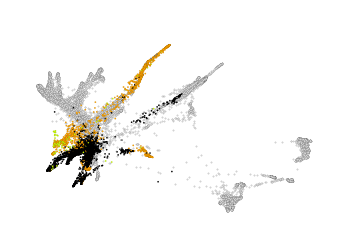

In [1604]:
# Creating sub dataframes based on the specified conditions
sub1 = merged_df[merged_df['neighbors_200_3'].isin([15, 1, 13, 3])]
sub2 = merged_df[merged_df['neighbors_200_3'].isin([24, 29, 28, 16, 12, 20, 21, 5])]

# Combining the sub dataframes
sub = pd.concat([sub1, sub2])

# Creating the t_ dataframe with rows not in the sub dataframe
t_ = merged_df[~merged_df['id'].isin(sub2['id'])]

# Plotting the scatter plots
plt.scatter(t_['New_x'], t_['New_y'], c='lightgrey', s=2.5, edgecolors='black', linewidth=0.05)
plt.scatter(sub2['New_x'], sub2['New_y'], c=sub2['Color_P6'], s=2.5, edgecolors='black', linewidth=0.05)

# Setting plot limits and axis off
plt.xlim(-0.021, 0.03)
plt.ylim(-0.021, 0.03)
plt.axis('off')
plt.savefig("./Alternativeneighbors_400_1_P_vs_S_dodeca_new_pos_7.png", dpi=1000, bbox_inches='tight')

# Displaying the plot
plt.show()


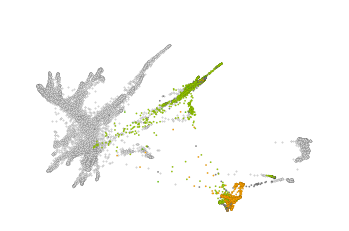

In [1554]:
sub=merged_df[(merged_df['neighbors_1900_1']==2)| (merged_df['neighbors_1600_1']==4)]

t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P2'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
plt.savefig("./Alternative_neighbors_1900_1-2_vsneighbors_1600_1-4_L_vs_S_dodeca_new_pos_3.png", dpi=1000, bbox_inches='tight')
plt.show()

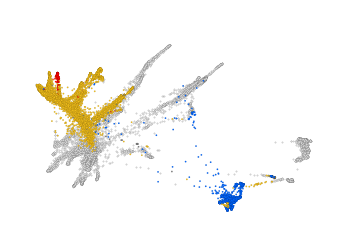

In [1530]:
sub=merged_df[(merged_df['neighbors_1900_1']==2)| (merged_df['neighbors_1900_1']==1)]

t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P11'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./Alternative_neighbors_1900_3_N_vs_H_dodeca_new_pos_11.png", dpi=1000, bbox_inches='tight')
plt.show()

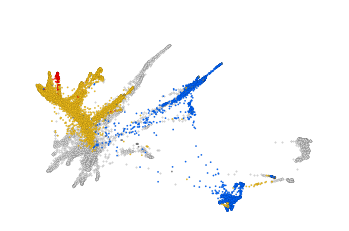

In [1540]:
sub=merged_df[(merged_df['neighbors_1900_1']==2)| (merged_df['neighbors_1900_1']==1)|(merged_df['neighbors_1600_1']==4)]

t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P11'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
plt.savefig("./Alternative_neighbors_1900_3_N_vs_H_dodeca_new_pos_11.png", dpi=1000, bbox_inches='tight')
plt.show()

In [1539]:
# ! rm ./Alternative_neighbors_1900_3_N_vs_H_dodeca_new_pos_11.png

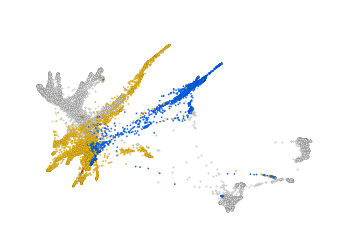

In [1534]:
sub=merged_df[merged_df['neighbors_1900_1']==0]

t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P11'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./Alternative_neighbors_1900_3_N_vs_H_dodeca_new_pos_11.png", dpi=1000, bbox_inches='tight')
plt.show()

In [1529]:
# ! rm ./Alternative_neighbors_1900_3_N_vs_H_dodeca_new_pos_11.png

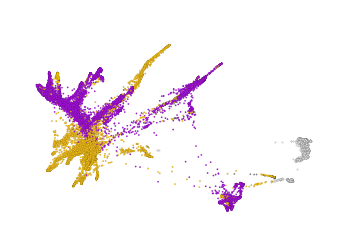

In [1525]:
# sub
t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P7'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
plt.savefig("./Alternative_neighbors_1900_1.2.0_D_vs_N_dodeca_pos_8.png", dpi=1000, bbox_inches='tight')
plt.show()

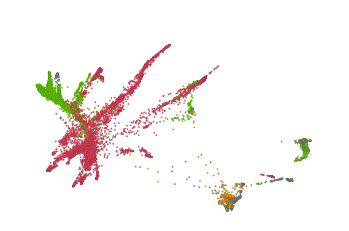

In [36]:
sub=merged_df#[(merged_df['neighbors_1300_1']==1)]
t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P9'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./png/neighbors_1300_1_I_vs_L_dodeca_new_pos_9.png", dpi=1000, bbox_inches='tight')
plt.show()

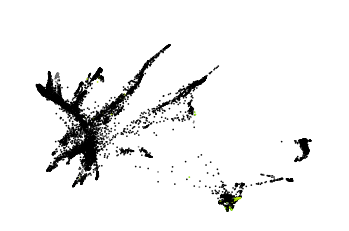

In [33]:
sub=merged_df#[(merged_df['neighbors_1300_1']==1)]
t_=merged_df[~merged_df['id'].isin(sub['id'])]
plt.scatter(t_['New_x'],t_['New_y'], c='lightgrey', s=2.5,edgecolors='black',linewidth=.05)

plt.scatter(sub['New_x'],sub['New_y'], c=sub['Color_P8'], s=2.5,edgecolors='black',linewidth=.05)
# ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./png/neighbors_1300_1_I_vs_L_dodeca_new_pos_9.png", dpi=1000, bbox_inches='tight')
plt.show()

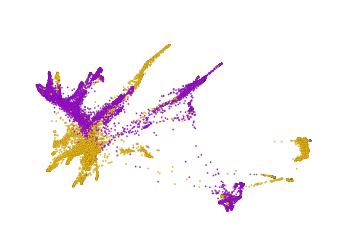

In [1501]:
merged_df
plt.scatter(merged_df['New_x'],merged_df['New_y'], c=color_lists['Pos_7'], s=2.5,edgecolors='black',linewidth=.05)
ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./D_vs_N_dodeca_new.png", dpi=1000, bbox_inches='tight')
plt.show()


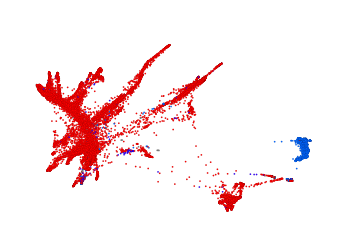

In [1502]:
merged_df
plt.scatter(merged_df['New_x'],merged_df['New_y'], c=color_lists['Pos_0'], s=2.5,edgecolors='black',linewidth=.05)
ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
plt.savefig("./Alternative_H_vs_R_dodeca_new_Pos1.png", dpi=1000, bbox_inches='tight')
plt.show()

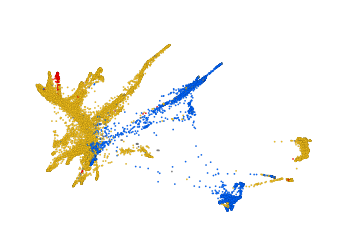

In [1527]:
merged_df
plt.scatter(merged_df['New_x'],merged_df['New_y'], c=color_lists['Pos_11'], s=2.5,edgecolors='black',linewidth=.05)
ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./Alternative_H_vs_R_dodeca_new_Pos1.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
print('pos 12')
plt.scatter(merged_df['New_x'],merged_df['New_y'], c=color_lists['Pos_11'], s=2.5,edgecolors='black',linewidth=.05)
ax.set_title(f'Dodecapeptide Position {i+1}')
        
plt.xlim(-0.021,0.03)
plt.ylim(-0.021,0.03)
plt.axis('off')
# plt.savefig("./Alternative_H_vs_R_dodeca_new_Pos1.png", dpi=1000, bbox_inches='tight')
plt.show()

In [1395]:
# ! rm ./D_vs_N_dodeca_new.pdf

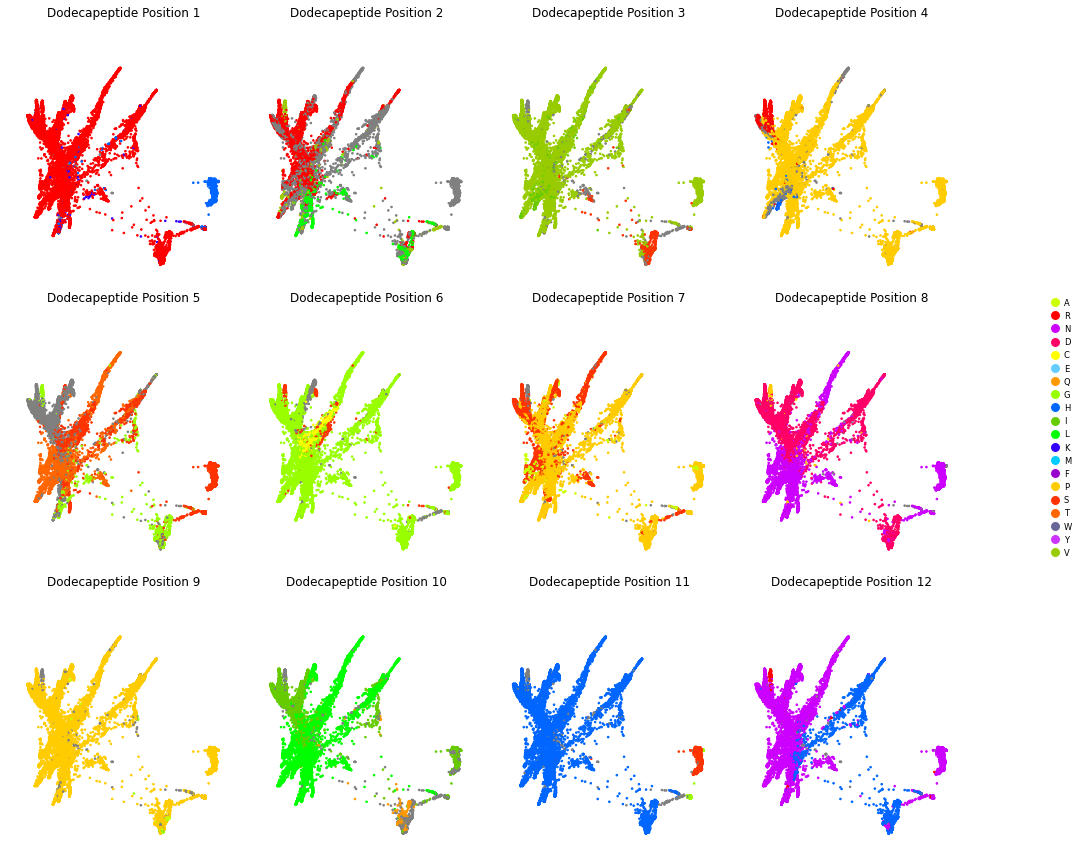

In [1335]:
# Create 3x4 grid plot with modifications
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

for i, ax in enumerate(axes.ravel()):
    col_name = f'Pos_{i}'
    if col_name in color_lists:
        sc = ax.scatter(twoD['New_x'],twoD['New_y'], c=color_lists[color_lists], s=2.5)
        ax.set_title(f'Dodecapeptide Position {i+1}')
        
        ax.set_xlim(-0.021,0.03)
        ax.set_ylim(-0.021,0.03)
        ax.axis('off')
        
        # Add color legend for colors that are not 'grey'
        # First, get unique colors in the current subplot and remove 'grey'
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for aa, color in res_colo.items()]
legend_labels = list(res_colo.keys())
fig.legend(legend_handles, legend_labels, loc='center right', fontsize='small', handletextpad=0, frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=.9)  # Make space for the legend on the right

plt.suptitle("", y=1.02)
# plt.savefig("./PHASE_CLE_dodeca_new.pdf", dpi=1000, bbox_inches='tight')

plt.show()
